## "General Electric Data Analytics Project"

## GE Aviation Real Time Data

In [ ]:
import numpy as np
import pandas as pd
#sets the default autosave frequency in seconds
%autosave 60 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
np.random.seed(0)
np.set_printoptions(suppress=True)

In [6]:
df = pd.read_csv(r'/Users/mrinalpatil/Desktop/Forage/GeneralElectric/avenginedata.csv')

In [8]:
df.head(5)

dataset     esn  unit  flight_cycle             datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod  tra      t2      t24      t30      t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32
0  test_FD001  999126    26             1  2017-12-31 18:33:07      AXM        VTBD             VTUV      -0.0027        0.0006  100  518.67  1101.67  1582.88  1399.92  14.62  21.61  554.54  2388.02  9060.88  1.3  47.38  522.55  2387.98  8147.17  8.3468  0.03      392    2388        100  38.82  23.3876
1  test_FD001  999126    26             2  2017-12-31 19:59:49      AXM        VTUV             VTBD      -0.0029        0.0002  100  518.67  1102.02  1589.01  1398.46  14.62  21.61  554.11  2387.96  9063.16  1.3  47.21  521.85  2388.01  8146.58  8.4159  0.03      390    2388        100  39.00  23.3793
2  test_FD001  999126    26             3  2017-12-31 21:44:38      AXM        VTBD             VMMC       0.0008        0.0001  100  518.67  1102.36  1590.16  1398.40  14.62  21.61  554.39  2387.99  9057.29  1.3  47.16  522.34  2388.05  8144.60  8.4444  0.03      391    2388        100  39.20  23.3390
3  test_FD001  999126    26             4  2018-01-01 00:50:02      AXM        VMMC             VTBD      -0.0026        0.0005  100  518.67  1101.43  1583.37  1389.66  14.62  21.61  553.59  2387.99  9064.94  1.3  47.19  522.03  2388.00  8147.98  8.3986  0.03      392    2388        100  38.97  23.3931
4  test_FD001  999126    26             5  2018-01-01 04:25:32      AXM        VTBD             VTSP       0.0020        0.0005  100  518.67  1102.21  1591.71  1403.84  14.62  21.61  554.51  2388.01  9062.58  1.3  47.38  522.04  2388.00  8142.07  8.4332  0.03      391    2388        100  39.11  23.3904

In [10]:
df1 = df.sample(frac=0.5,random_state=0)
df1.head()

dataset     esn  unit  flight_cycle             datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod  tra      t2      t24      t30       t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32
10457  train_FD001  999097    97           194  2018-03-04 01:03:00      AXM        VRMM             VTBD      -0.0008       -0.0002  100  518.67  1103.19  1605.46  1418.235  14.62  21.61  553.18  2388.15  9197.35  1.3  48.16  520.41  2388.12  8255.95  8.5132  0.03      397    2388        100  38.38  22.9548
24716  train_FD001  999015    15           116  2018-01-16 11:14:19     FRON        KDEN             KDSM       0.0042       -0.0004  100  518.67  1102.48  1590.55  1405.440  14.62  21.61  553.88  2388.13  9059.01  1.3  47.49  521.52  2388.15  8131.93  8.4141  0.03      393    2388        100  38.79  23.1558
21745   test_FD001  999159    59            15  2018-01-04 17:23:30     FRON        KIND             KMCO      -0.0019        0.0002  100  518.67  1101.59  1581.43  1397.660  14.62  21.61  553.76  2387.98  9053.86  1.3  47.15  521.75  2388.00  8141.38  8.3718  0.03      390    2388        100  39.07  23.3881
23353   test_FD001  999121    21            76  2018-01-10 18:39:21     FRON        KMSP             KDEN      -0.0007        0.0002  100  518.67  1102.14  1587.85  1397.230  14.62  21.61  553.97  2387.97  9057.68  1.3  47.24  521.67  2388.05  8137.22  8.4238  0.03      391    2388        100  39.15  23.3627
12172  train_FD001  999054    54            40  2018-01-10 02:50:42      AXM        WIII             WMKK       0.0010        0.0001  100  518.67  1101.58  1586.91  1392.190  14.62  21.61  553.85  2388.03  9060.22  1.3  47.35  522.59  2388.04  8148.27  8.4118  0.03      390    2388        100  39.11  23.3904

## Build a supporting KPI table

In [12]:
manu = pd.read_csv(r'/Users/mrinalpatil/Desktop/Forage/GeneralElectric/av_manufacturing_supply_chain_psql.csv')

In [19]:
manu.head()

sn        pn     op part_desc  kc      msmts        max        min
0  7837606115  54321P01  op116    shroud   1  31.983503  33.061659  21.160852
1  5039651920  54321P01  op116    shroud   1  34.456691  33.061659  21.160852
2  7837606115  54321P01  op220    shroud   2  27.895096  30.303501  17.044897
3  5039651920  54321P01  op220    shroud   2  32.920628  30.303501  17.044897
4  9856636092  44321P02  op420     blade   1  12.640872  16.346054  10.600079

In [14]:
manu1 = manu.sample(frac=0.05, random_state=0)
manu1.head()

sn        pn     op part_desc   kc       msmts         max        min
11277  5897563181  54321P01  op116    shroud    1   24.172607   33.061659  21.160852
55819  3880534351  65421P11  op630      disk  120  141.158446  271.153922  99.827763
43223  4370057280  54321P01  op220    shroud    2   25.754601   30.303501  17.044897
1351    360209222  54321P01  op116    shroud    1   26.147983   33.061659  21.160852
9247   2915142739  65421P11  op630      disk   87  123.437705  271.153922  99.827763

In [16]:
bom = pd.read_csv(r'/Users/mrinalpatil/Desktop/Forage/GeneralElectric/av_bom_manufacturing_psql.csv')

In [17]:
bom.head()

esn        pn          sn    desc vstream
0  999010  54321P01   822106416  shroud     cmc
1  999010  54321P01   664475698  shroud     cmc
2  999010  54321P01  2430976214  shroud     cmc
3  999010  54321P01  1277358392  shroud     cmc
4  999010  54321P01  8668054501  shroud     cmc

In [18]:
bom1 = bom.sample(frac=0.1,random_state=0)

In [20]:
bom1.head()

esn        pn          sn    desc         vstream
7715   999046  54321P01  6804819408  shroud             cmc
18367  999155  65421P11  1202897627    disk  rotating_parts
3851   999063  54321P01  8776103838  shroud             cmc
10591  999095  54321P01  5414855032  shroud             cmc
7193   999021  54321P01   122236869  shroud             cmc

In [21]:
kpitable = pd.merge(left=manu1, right=bom1, how='inner',on='pn')

In [22]:
kpitable.head()

sn_x        pn     op part_desc  kc      msmts        max        min     esn        sn_y    desc vstream
0  5897563181  54321P01  op116    shroud   1  24.172607  33.061659  21.160852  999046  6804819408  shroud     cmc
1  5897563181  54321P01  op116    shroud   1  24.172607  33.061659  21.160852  999063  8776103838  shroud     cmc
2  5897563181  54321P01  op116    shroud   1  24.172607  33.061659  21.160852  999095  5414855032  shroud     cmc
3  5897563181  54321P01  op116    shroud   1  24.172607  33.061659  21.160852  999021   122236869  shroud     cmc
4  5897563181  54321P01  op116    shroud   1  24.172607  33.061659  21.160852  999011  8282194799  shroud     cmc

In [23]:
kpitable.duplicated().sum()

0

In [24]:
kpitable1 = kpitable.sample(frac=0.05, random_state=0)

In [26]:
kpitable1.head()

sn_x        pn     op part_desc  kc      msmts        max        min     esn        sn_y    desc vstream
697164   3628661032  54321P01  op116    shroud   1  30.978226  33.061659  21.160852  999146  3905519313  shroud     cmc
1319265  1823811079  54321P01  op220    shroud   2  23.890846  30.303501  17.044897  999159  7981949910  shroud     cmc
388623   4591973097  54321P01  op220    shroud   2  20.538837  30.303501  17.044897  999099   826350563  shroud     cmc
1023015  5235783172  54321P01  op220    shroud   2  17.307180  30.303501  17.044897  999093   896556326  shroud     cmc
47153    8868037964  54321P01  op116    shroud   1  18.394660  33.061659  21.160852  999013   761257699  shroud     cmc

# Joining the new KPI table to the consolidated flights table

In [40]:
step6 = pd.merge(left=df1, right=kpitable1, how='inner',on='esn')

In [42]:
step6.head(5)

dataset     esn  unit  flight_cycle             datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod  tra      t2      t24      t30       t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32        sn_x        pn     op part_desc  kc      msmts        max        min        sn_y    desc vstream
0  train_FD001  999097    97           194  2018-03-04 01:03:00      AXM        VRMM             VTBD      -0.0008       -0.0002  100  518.67  1103.19  1605.46  1418.235  14.62  21.61  553.18  2388.15  9197.35  1.3  48.16  520.41  2388.12  8255.95  8.5132  0.03      397    2388        100  38.38  22.9548   854808898  54321P01  op116    shroud   1  25.435562  33.061659  21.160852  9198033503  shroud     cmc
1  train_FD001  999097    97           194  2018-03-04 01:03:00      AXM        VRMM             VTBD      -0.0008       -0.0002  100  518.67  1103.19  1605.46  1418.235  14.62  21.61  553.18  2388.15  9197.35  1.3  48.16  520.41  2388.12  8255.95  8.5132  0.03      397    2388        100  38.38  22.9548  9561496345  54321P01  op116    shroud   1  28.541626  33.061659  21.160852  9198033503  shroud     cmc
2  train_FD001  999097    97           194  2018-03-04 01:03:00      AXM        VRMM             VTBD      -0.0008       -0.0002  100  518.67  1103.19  1605.46  1418.235  14.62  21.61  553.18  2388.15  9197.35  1.3  48.16  520.41  2388.12  8255.95  8.5132  0.03      397    2388        100  38.38  22.9548  8906674783  54321P01  op220    shroud   2  21.887296  30.303501  17.044897  9198033503  shroud     cmc
3  train_FD001  999097    97           194  2018-03-04 01:03:00      AXM        VRMM             VTBD      -0.0008       -0.0002  100  518.67  1103.19  1605.46  1418.235  14.62  21.61  553.18  2388.15  9197.35  1.3  48.16  520.41  2388.12  8255.95  8.5132  0.03      397    2388        100  38.38  22.9548  7395642145  54321P01  op116    shroud   1  30.412516  33.061659  21.160852  9516328176  shroud     cmc
4  train_FD001  999097    97           194  2018-03-04 01:03:00      AXM        VRMM             VTBD      -0.0008       -0.0002  100  518.67  1103.19  1605.46  1418.235  14.62  21.61  553.18  2388.15  9197.35  1.3  48.16  520.41  2388.12  8255.95  8.5132  0.03      397    2388        100  38.38  22.9548  1340183150  54321P01  op116    shroud   1  21.128166  33.061659  21.160852  9198033503  shroud     cmc

## Joining final table with table from step 5 to get remaining useful life (RUL*) for each engine

In [30]:
rul = pd.read_csv(r'/Users/mrinalpatil/Desktop/Forage/GeneralElectric/av_esn_rul_psql.csv')

In [31]:
rul.head()

esn  rul
0  999175  123
1  999197   95
2  999123  141
3  999122  122
4  999126  162

In [32]:
step7 = pd.merge(left=df1, right=rul, how='inner',on='esn')

In [34]:
step7.head(5)

dataset     esn  unit  flight_cycle             datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod  tra      t2      t24      t30      t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32  rul
0  test_FD001  999159    59            15  2018-01-04 17:23:30     FRON        KIND             KMCO      -0.0019        0.0002  100  518.67  1101.59  1581.43  1397.66  14.62  21.61  553.76  2387.98  9053.86  1.3  47.15  521.75  2388.00  8141.38  8.3718  0.03      390    2388        100  39.07  23.3881  119
1  test_FD001  999159    59             1  2017-12-31 20:29:57     FRON        KMCO             KCVG      -0.0008       -0.0004  100  518.67  1101.92  1589.29  1395.20  14.62  21.61  554.74  2387.96  9050.56  1.3  47.44  522.52  2388.02  8139.38  8.3801  0.03      390    2388        100  39.14  23.3486  119
2  test_FD001  999159    59            55  2018-01-09 12:13:13     FRON        KLAX             KATL       0.0008       -0.0001  100  518.67  1101.80  1577.44  1396.72  14.62  21.61  554.42  2387.97  9052.88  1.3  47.20  522.58  2388.04  8134.88  8.3841  0.03      393    2388        100  39.06  23.3695  119
3  test_FD001  999159    59             6  2018-01-02 06:49:26     FRON        KMKE             KMIA      -0.0009       -0.0002  100  518.67  1101.40  1579.85  1397.03  14.62  21.61  554.92  2388.00  9060.03  1.3  47.12  522.20  2388.00  8134.46  8.4105  0.03      391    2388        100  38.94  23.3968  119
4  test_FD001  999159    59            66  2018-01-10 09:13:00     FRON        KSAT             KONT       0.0003        0.0001  100  518.67  1101.92  1585.21  1406.96  14.62  21.61  554.56  2388.05  9061.70  1.3  47.12  522.33  2388.03  8134.46  8.4097  0.03      393    2388        100  38.98  23.4150  119

In [37]:
step7.to_csv("final.csv",index=False)

## COMBINING AV_ENGINE_DATA

In [43]:
df11 = pd.read_csv(r'/Users/mrinalpatil/Desktop/Forage/GeneralElectric/av_engine_data_aic_psql.csv')


In [45]:
df11

Empty DataFrame
Columns: [dataset, esn, unit, flight_cycle, datetime, operator, depart_icao, destination_icao, hpc_eff_mod, hpc_flow_mod, tra, t2, t24, t30, t50, p2, p15, p30, nf, nc, epr, ps30, phi, nrf, nrc, bpr, farb, htbleed, nf_dmd, pcnfr_dmd, w31, w32]
Index: []

In [46]:
df12 = pd.read_csv(r'/Users/mrinalpatil/Desktop/Forage/GeneralElectric/av_engine_data_axm_psql.csv')

In [47]:
df12.head(5)

dataset     esn  unit  flight_cycle             datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod  tra      t2     t24      t30      t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32
0  test_FD001  999126    26             1  2017-12-31 18:33:07      AXM        VTBD             VTUV      -0.0027        0.0006  100  518.67  642.00  1582.88  1399.92  14.62  21.61  554.54  2388.02  9060.88  1.3  47.38  522.55  2387.98  8147.17  8.3468  0.03      392    2388        100  38.82  23.3876
1  test_FD001  999126    26             2  2017-12-31 19:59:49      AXM        VTUV             VTBD      -0.0029        0.0002  100  518.67  642.35  1589.01  1398.46  14.62  21.61  554.11  2387.96  9063.16  1.3  47.21  521.85  2388.01  8146.58  8.4159  0.03      390    2388        100  39.00  23.3793
2  test_FD001  999126    26             3  2017-12-31 21:44:38      AXM        VTBD             VMMC       0.0008        0.0001  100  518.67  642.69  1590.16  1398.40  14.62  21.61  554.39  2387.99  9057.29  1.3  47.16  522.34  2388.05  8144.60  8.4444  0.03      391    2388        100  39.20  23.3390
3  test_FD001  999126    26             4  2018-01-01 00:50:02      AXM        VMMC             VTBD      -0.0026        0.0005  100  518.67  641.76  1583.37  1389.66  14.62  21.61  553.59  2387.99  9064.94  1.3  47.19  522.03  2388.00  8147.98  8.3986  0.03      392    2388        100  38.97  23.3931
4  test_FD001  999126    26             5  2018-01-01 04:25:32      AXM        VTBD             VTSP       0.0020        0.0005  100  518.67  642.54  1591.71  1403.84  14.62  21.61  554.51  2388.01  9062.58  1.3  47.38  522.04  2388.00  8142.07  8.4332  0.03      391    2388        100  39.11  23.3904

In [48]:
df13 = pd.read_csv(r'/Users/mrinalpatil/Desktop/Forage/GeneralElectric/av_engine_data_fron_psql.csv')

In [49]:
df13.head(5)

dataset     esn  unit  flight_cycle             datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod  tra      t2     t24      t30      t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32
0  train_FD001  999050    50             1  2018-01-06 06:01:09     FRON        KMCO             KMSY      -0.0029       -0.0002  100  518.67  642.66  1591.79  1401.30  14.62  21.60  554.60  2388.01  9064.12  1.3  47.47  521.68  2388.06  8151.49  8.4158  0.03      393    2388        100  38.80  23.3016
1  train_FD001  999050    50             2  2018-01-06 07:41:00     FRON        KMSY             KSAT      -0.0002       -0.0005  100  518.67  642.28  1587.84  1404.96  14.62  21.61  553.60  2388.06  9065.83  1.3  47.33  522.12  2388.07  8142.72  8.4467  0.03      392    2388        100  38.99  23.3440
2  train_FD001  999050    50             3  2018-01-06 08:41:18     FRON        KMSY             KSAT      -0.0010       -0.0005  100  518.67  642.21  1586.89  1404.47  14.62  21.61  554.31  2388.05  9065.63  1.3  47.48  521.96  2388.05  8139.14  8.4424  0.03      393    2388        100  38.91  23.3190
3  train_FD001  999050    50             4  2018-01-06 10:14:00     FRON        KSAT             KSAN      -0.0061       -0.0002  100  518.67  643.19  1587.36  1398.90  14.62  21.61  554.35  2388.07  9059.91  1.3  47.30  522.31  2388.04  8145.16  8.4504  0.03      393    2388        100  38.95  23.3161
4  train_FD001  999050    50             5  2018-01-06 11:12:52     FRON        KSAT             KSAN      -0.0002        0.0001  100  518.67  642.47  1584.96  1406.08  14.62  21.61  554.03  2388.00  9073.29  1.3  47.44  522.05  2388.05  8145.35  8.3822  0.03      392    2388        100  38.83  23.3256

In [50]:
df14 = pd.read_csv(r'/Users/mrinalpatil/Desktop/Forage/GeneralElectric/av_engine_data_pgt_psql.csv')

In [51]:
df14.head(5)

dataset     esn  unit  flight_cycle             datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod  tra      t2     t24      t30       t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32
0  train_FD001  999056    56             1  2018-01-01 06:33:13      PGT        LTBJ             LTCR       0.0012       -0.0004  100  518.67  642.75  1586.44  1412.720  14.62  21.61  552.68  2388.10  9059.10  1.3  47.72  521.18  2388.13  8136.92  8.4412  0.03      395    2388        100  38.81  23.2391
1  train_FD001  999056    56             2  2018-01-01 09:40:21      PGT        LTCR             LTBJ       0.0012       -0.0004  100  518.67  642.47  1584.96  1410.405  14.62  21.61  552.90  2388.12  9057.99  1.3  47.42  520.82  2388.08  8133.11  8.4461  0.03      394    2388        100  38.82  23.3340
2  train_FD001  999056    56             3  2018-01-01 12:23:01      PGT        LTBJ             LTFJ       0.0026        0.0005  100  518.67  642.52  1587.64  1403.700  14.62  21.61  553.52  2388.13  9054.91  1.3  47.48  521.70  2388.12  8136.86  8.4357  0.03      394    2388        100  38.89  23.2844
3  train_FD001  999056    56             4  2018-01-01 14:11:10      PGT        LTFJ             LTCG       0.0034       -0.0002  100  518.67  642.51  1587.80  1410.585  14.62  21.61  553.60  2388.13  9045.30  1.3  47.49  522.06  2388.18  8132.53  8.4411  0.03      394    2388        100  38.79  23.3204
4  train_FD001  999056    56             5  2018-01-01 21:10:50      PGT        LTCG             LTFJ       0.0024       -0.0001  100  518.67  643.08  1593.15  1401.460  14.62  21.61  553.45  2388.03  9046.37  1.3  47.67  521.36  2388.16  8133.47  8.4824  0.03      394    2388        100  39.00  23.3592

In [53]:
df_final = pd.concat([df11,df12,df13,df14],axis=0)

In [54]:
df_final.head(5)

dataset     esn unit flight_cycle             datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod  tra      t2     t24      t30      t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb htbleed nf_dmd pcnfr_dmd    w31      w32
0  test_FD001  999126   26            1  2017-12-31 18:33:07      AXM        VTBD             VTUV      -0.0027        0.0006  100  518.67  642.00  1582.88  1399.92  14.62  21.61  554.54  2388.02  9060.88  1.3  47.38  522.55  2387.98  8147.17  8.3468  0.03     392   2388       100  38.82  23.3876
1  test_FD001  999126   26            2  2017-12-31 19:59:49      AXM        VTUV             VTBD      -0.0029        0.0002  100  518.67  642.35  1589.01  1398.46  14.62  21.61  554.11  2387.96  9063.16  1.3  47.21  521.85  2388.01  8146.58  8.4159  0.03     390   2388       100  39.00  23.3793
2  test_FD001  999126   26            3  2017-12-31 21:44:38      AXM        VTBD             VMMC       0.0008        0.0001  100  518.67  642.69  1590.16  1398.40  14.62  21.61  554.39  2387.99  9057.29  1.3  47.16  522.34  2388.05  8144.60  8.4444  0.03     391   2388       100  39.20  23.3390
3  test_FD001  999126   26            4  2018-01-01 00:50:02      AXM        VMMC             VTBD      -0.0026        0.0005  100  518.67  641.76  1583.37  1389.66  14.62  21.61  553.59  2387.99  9064.94  1.3  47.19  522.03  2388.00  8147.98  8.3986  0.03     392   2388       100  38.97  23.3931
4  test_FD001  999126   26            5  2018-01-01 04:25:32      AXM        VTBD             VTSP       0.0020        0.0005  100  518.67  642.54  1591.71  1403.84  14.62  21.61  554.51  2388.01  9062.58  1.3  47.38  522.04  2388.00  8142.07  8.4332  0.03     391   2388       100  39.11  23.3904

In [55]:
df_final.reset_index(drop=True, inplace=True)

In [67]:
df_final.head(5)

dataset     esn unit flight_cycle             datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod  tra      t2      t24      t30      t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb htbleed nf_dmd pcnfr_dmd    w31      w32
0  test_FD001  999126   26            1  2017-12-31 18:33:07      AXM        VTBD             VTUV      -0.0027        0.0006  100  518.67  1101.67  1582.88  1399.92  14.62  21.61  554.54  2388.02  9060.88  1.3  47.38  522.55  2387.98  8147.17  8.3468  0.03     392   2388       100  38.82  23.3876
1  test_FD001  999126   26            2  2017-12-31 19:59:49      AXM        VTUV             VTBD      -0.0029        0.0002  100  518.67  1102.02  1589.01  1398.46  14.62  21.61  554.11  2387.96  9063.16  1.3  47.21  521.85  2388.01  8146.58  8.4159  0.03     390   2388       100  39.00  23.3793
2  test_FD001  999126   26            3  2017-12-31 21:44:38      AXM        VTBD             VMMC       0.0008        0.0001  100  518.67  1102.36  1590.16  1398.40  14.62  21.61  554.39  2387.99  9057.29  1.3  47.16  522.34  2388.05  8144.60  8.4444  0.03     391   2388       100  39.20  23.3390
3  test_FD001  999126   26            4  2018-01-01 00:50:02      AXM        VMMC             VTBD      -0.0026        0.0005  100  518.67  1101.43  1583.37  1389.66  14.62  21.61  553.59  2387.99  9064.94  1.3  47.19  522.03  2388.00  8147.98  8.3986  0.03     392   2388       100  38.97  23.3931
4  test_FD001  999126   26            5  2018-01-01 04:25:32      AXM        VTBD             VTSP       0.0020        0.0005  100  518.67  1102.21  1591.71  1403.84  14.62  21.61  554.51  2388.01  9062.58  1.3  47.38  522.04  2388.00  8142.07  8.4332  0.03     391   2388       100  39.11  23.3904

In [58]:
df_final.to_csv("avenginedata.csv",index=False)

Now as per directed creating a new column "t24_adjusted" that is the result of the column named t24 + 459.67. Then changing the original td4 column to "t24_original", and changing "t24_adjusted" to "t24".

In [60]:
df_final['t24'] = df_final['t24'] + 459.67

In [61]:
df_final.head(5)

dataset     esn unit flight_cycle             datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod  tra      t2      t24      t30      t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb htbleed nf_dmd pcnfr_dmd    w31      w32
0  test_FD001  999126   26            1  2017-12-31 18:33:07      AXM        VTBD             VTUV      -0.0027        0.0006  100  518.67  1101.67  1582.88  1399.92  14.62  21.61  554.54  2388.02  9060.88  1.3  47.38  522.55  2387.98  8147.17  8.3468  0.03     392   2388       100  38.82  23.3876
1  test_FD001  999126   26            2  2017-12-31 19:59:49      AXM        VTUV             VTBD      -0.0029        0.0002  100  518.67  1102.02  1589.01  1398.46  14.62  21.61  554.11  2387.96  9063.16  1.3  47.21  521.85  2388.01  8146.58  8.4159  0.03     390   2388       100  39.00  23.3793
2  test_FD001  999126   26            3  2017-12-31 21:44:38      AXM        VTBD             VMMC       0.0008        0.0001  100  518.67  1102.36  1590.16  1398.40  14.62  21.61  554.39  2387.99  9057.29  1.3  47.16  522.34  2388.05  8144.60  8.4444  0.03     391   2388       100  39.20  23.3390
3  test_FD001  999126   26            4  2018-01-01 00:50:02      AXM        VMMC             VTBD      -0.0026        0.0005  100  518.67  1101.43  1583.37  1389.66  14.62  21.61  553.59  2387.99  9064.94  1.3  47.19  522.03  2388.00  8147.98  8.3986  0.03     392   2388       100  38.97  23.3931
4  test_FD001  999126   26            5  2018-01-01 04:25:32      AXM        VTBD             VTSP       0.0020        0.0005  100  518.67  1102.21  1591.71  1403.84  14.62  21.61  554.51  2388.01  9062.58  1.3  47.38  522.04  2388.00  8142.07  8.4332  0.03     391   2388       100  39.11  23.3904

In [62]:
df_final['t24'].value_counts()

1102.16    354
1102.21    337
1102.12    336
1102.17    336
1102.34    332
          ... 
1101.00      1
1100.93      1
1104.01      1
1104.11      1
1103.96      1
Name: t24, Length: 306, dtype: int64

In [65]:
df.to_csv("avenginedata.csv",index=False)

## DATA VISUALIZATION

For data visualization, i have used Run Charts and KPIs:

A Run Chart is a line graph that is plotted over time. Run Charts are considered time series charts, they are used to plot data points (typically) over a given time frame. This helps us to track how our manufacturing process is performing over time as our machinery ages. 

KPI are values calculated such that use a single number to give insight to the performance of a process (is it behaving expected range). This helps us to quickly and efficiently make decisions around what improvements we can make in our process.

In [68]:
df111 = pd.read_csv(r'/Users/mrinalpatil/Desktop/Forage/GeneralElectric/av_manufacturing_per_part_psql.csv')

In [69]:
df111.head(5)

sn        pn     op part_desc  kc        max        min      msmts     esn    desc            vstream
0  5161682827  54321P01  op116    shroud   1  33.061659  21.160852  31.562316  999001  shroud                cmc
1  5161682827  54321P01  op220    shroud   2  30.303501  17.044897  23.209891  999001  shroud                cmc
2  9279369647  44321P02  op420     blade   1  16.346054  10.600079  10.902121  999001   blade  machined_airfoils
3  2221077760  44321P02  op420     blade   1  16.346054  10.600079  12.314152  999001   blade  machined_airfoils
4  9279369647  44321P02  op016     blade   2  27.987527  11.183152  12.711093  999001   blade  machined_airfoils

In [70]:
# Exploratory data analysis (EDA)

In [71]:
df111.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sn         64000 non-null  int64  
 1   pn         64000 non-null  object 
 2   op         64000 non-null  object 
 3   part_desc  64000 non-null  object 
 4   kc         64000 non-null  int64  
 5   max        64000 non-null  float64
 6   min        64000 non-null  float64
 7   msmts      64000 non-null  float64
 8   esn        64000 non-null  int64  
 9   desc       64000 non-null  object 
 10  vstream    64000 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 5.4+ MB


In [72]:
df111.describe()

sn            kc           max           min         msmts            esn
count  6.400000e+04  64000.000000  64000.000000  64000.000000  64000.000000   64000.000000
mean   4.926695e+09     23.625000    118.083144     53.089586     85.720892  999100.500000
std    2.824054e+09     35.580952    116.567149     49.149875     90.146396      57.734756
min    4.117150e+05      1.000000     16.346054     10.600079      3.030937  999001.000000
25%    2.497442e+09      1.000000     29.724507     15.579461     20.203817  999050.750000
50%    4.790020e+09      2.000000     33.061659     21.160852     28.272678  999100.500000
75%    7.366001e+09     40.250000    265.701968     99.827763    165.682144  999150.250000
max    9.999885e+09    120.000000    271.153922    130.588794    362.062278  999200.000000

In [73]:
df111.columns

Index(['sn', 'pn', 'op', 'part_desc', 'kc', 'max', 'min', 'msmts', 'esn', 'desc', 'vstream'], dtype='object')

In [74]:
df111.isnull().sum()

sn           0
pn           0
op           0
part_desc    0
kc           0
max          0
min          0
msmts        0
esn          0
desc         0
vstream      0
dtype: int64

In [76]:
df111[['sn','kc','pn','esn']].corr()

sn            kc           esn
sn   1.000000 -3.241256e-02 -1.836207e-02
kc  -0.032413  1.000000e+00  3.057224e-12
esn -0.018362  3.057224e-12  1.000000e+00

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime


<AxesSubplot:>

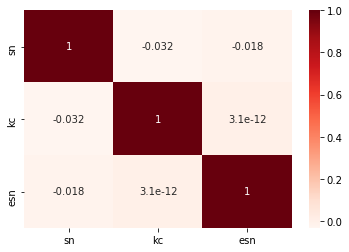

In [83]:
sns.heatmap(df111[['sn','kc','pn','esn']].corr(), annot=True, cmap = 'Reds')

In [84]:
## Univariate Data Exploration

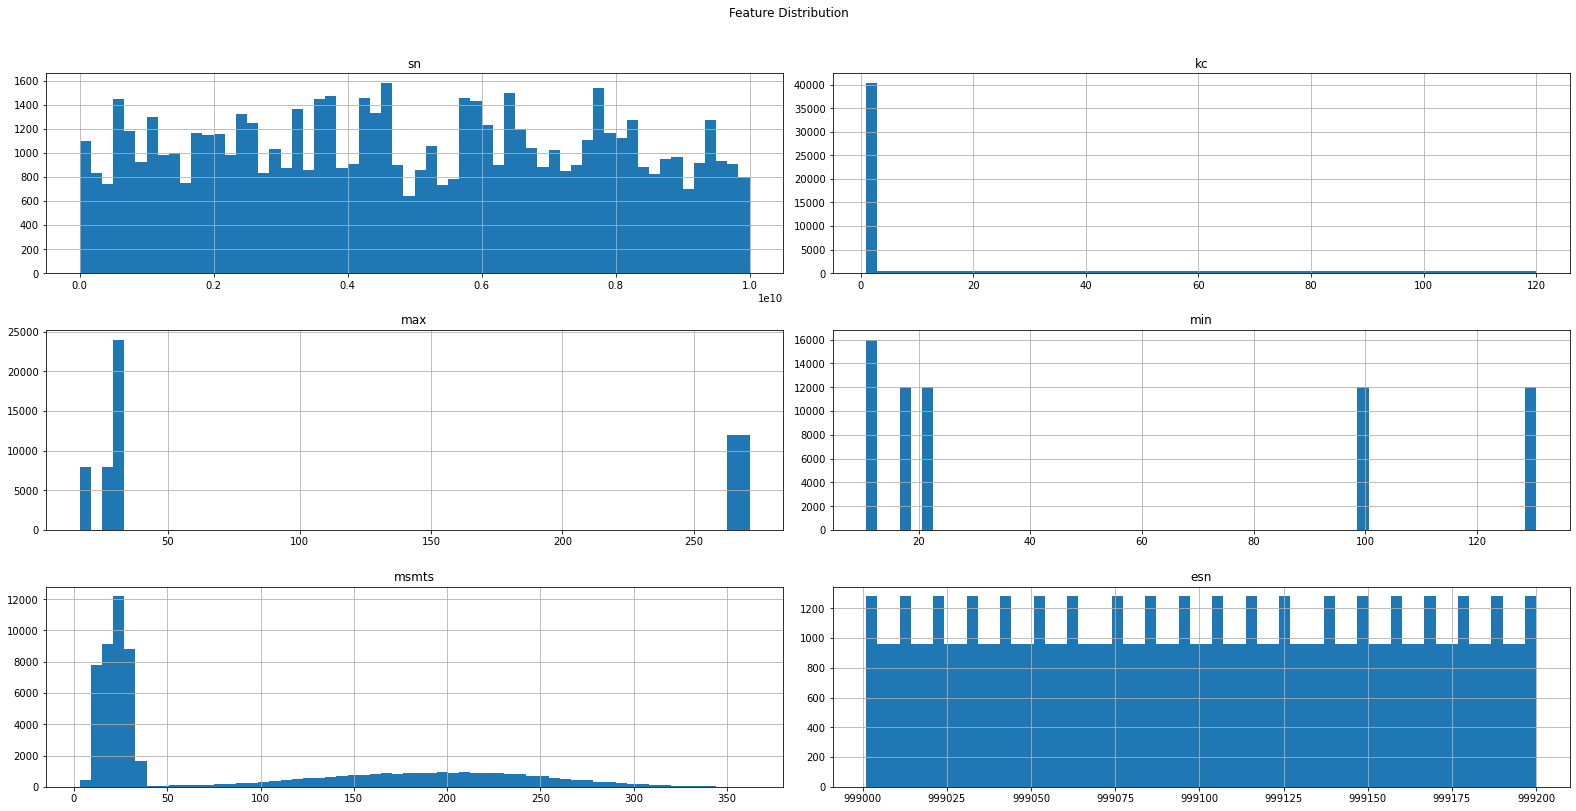

In [90]:
df111.hist(bins=60, figsize=(22,11))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

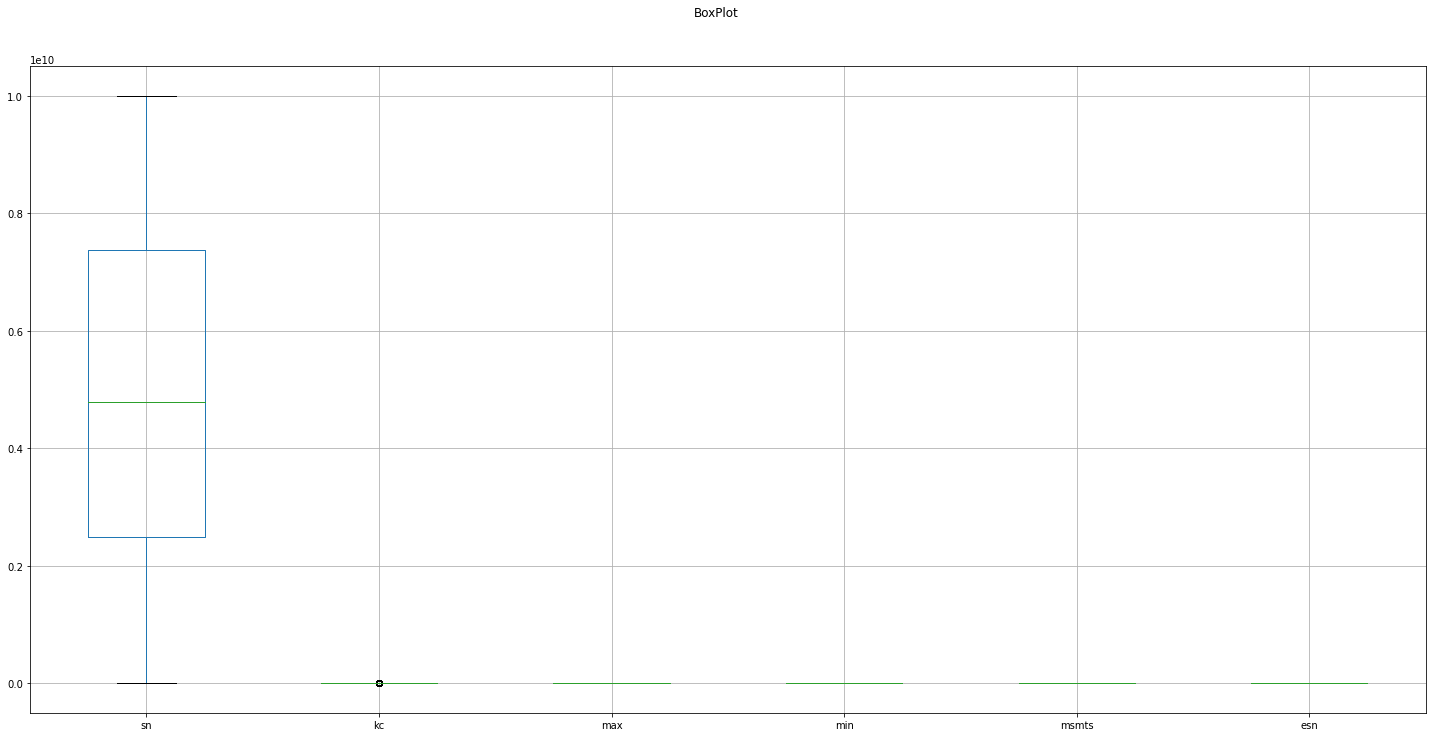

In [91]:
df111.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [92]:
df112 = df111.sample(n=50, random_state=0)

In [93]:
df112.head(5)

sn        pn     op part_desc  kc         max         min       msmts     esn    desc            vstream
11277  8168298841  54321P01  op116    shroud   1   33.061659   21.160852   31.624629  999033  shroud                cmc
55819  8255969037  54321P01  op220    shroud   2   30.303501   17.044897   20.413078  999179  shroud                cmc
43223  7415323825  65421P11  op232      disk  21  265.701968  130.588794  193.141955  999174    disk     rotating_parts
1351   8226413398  44321P02  op420     blade   1   16.346054   10.600079   15.740106  999011   blade  machined_airfoils
9247   8193965112  44321P02  op420     blade   1   16.346054   10.600079   13.083395  999031   blade  machined_airfoils

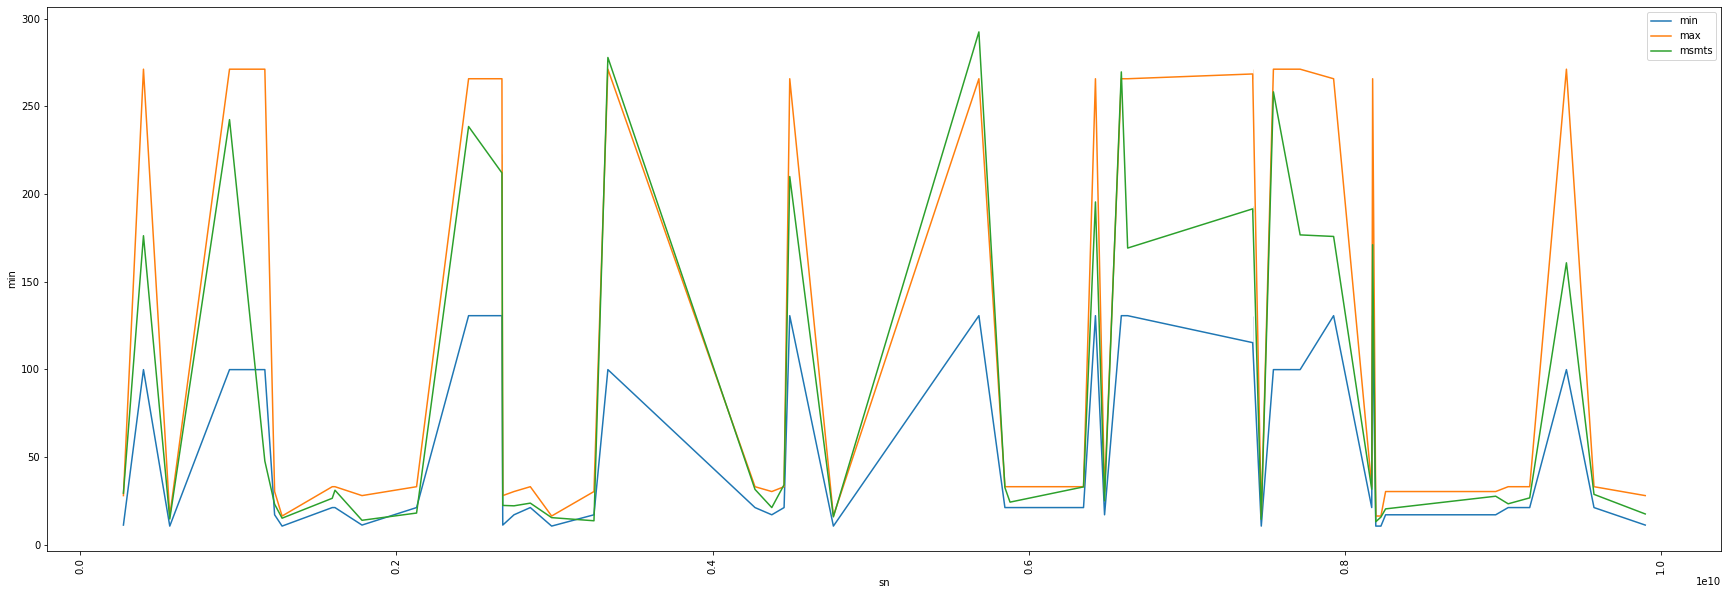

In [94]:
plt.figure(figsize=(30,10))
sns.lineplot(x='sn',y='min',data=df112)
sns.lineplot(x='sn',y='max',data=df112)
sns.lineplot(x='sn',y='msmts',data=df112)
plt.legend(labels=['min', 'max', 'msmts'])
plt.xticks(rotation=90)
plt.show()

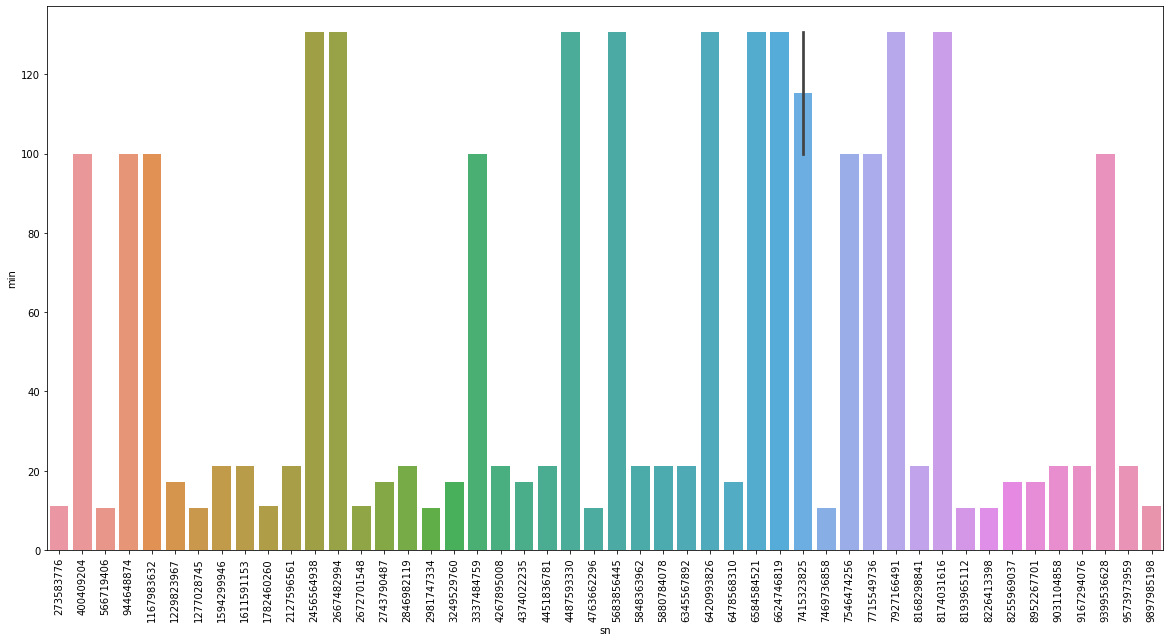

In [95]:
plt.figure(figsize=(20,10))
sns.barplot(x='sn',y='min',data=df112)
plt.xticks(rotation=90)
plt.show()

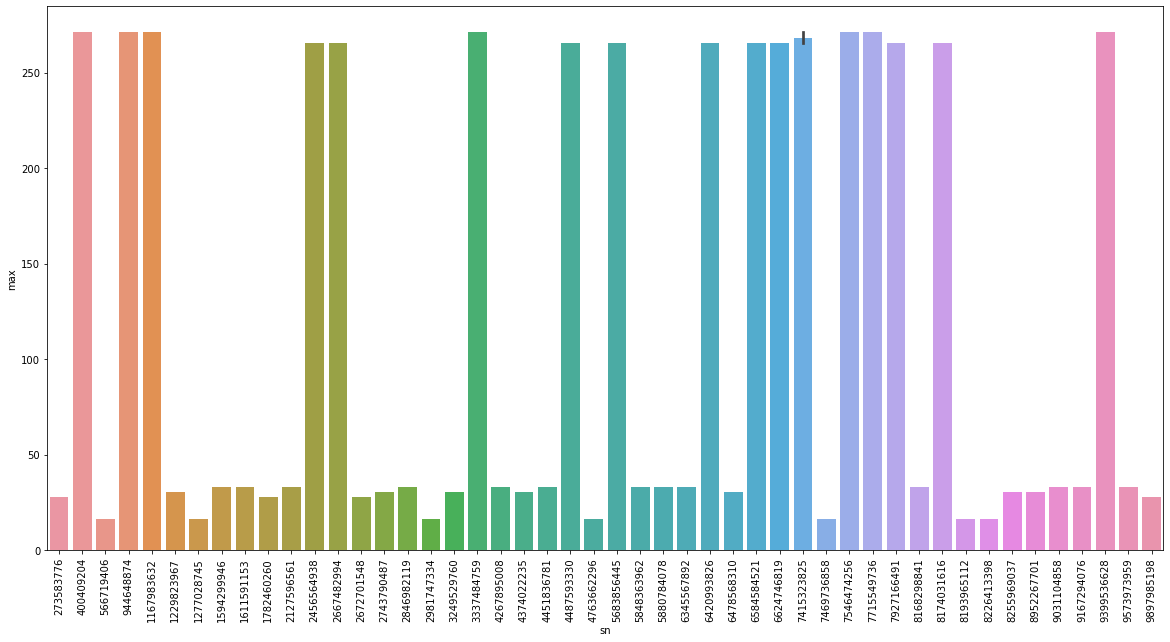

In [96]:
plt.figure(figsize=(20,10))
sns.barplot(x='sn',y ='max',data=df112)
plt.xticks(rotation=90)
plt.show()

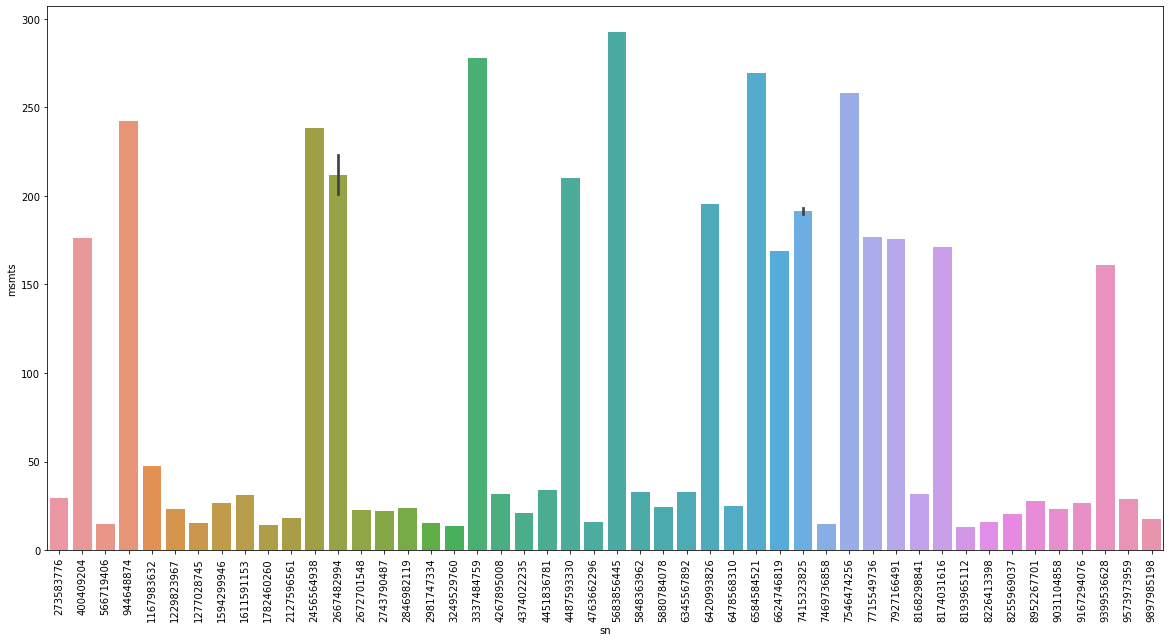

In [97]:
plt.figure(figsize=(20,10))
sns.barplot(x='sn',y='msmts',data=df112)
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x1440 with 0 Axes>

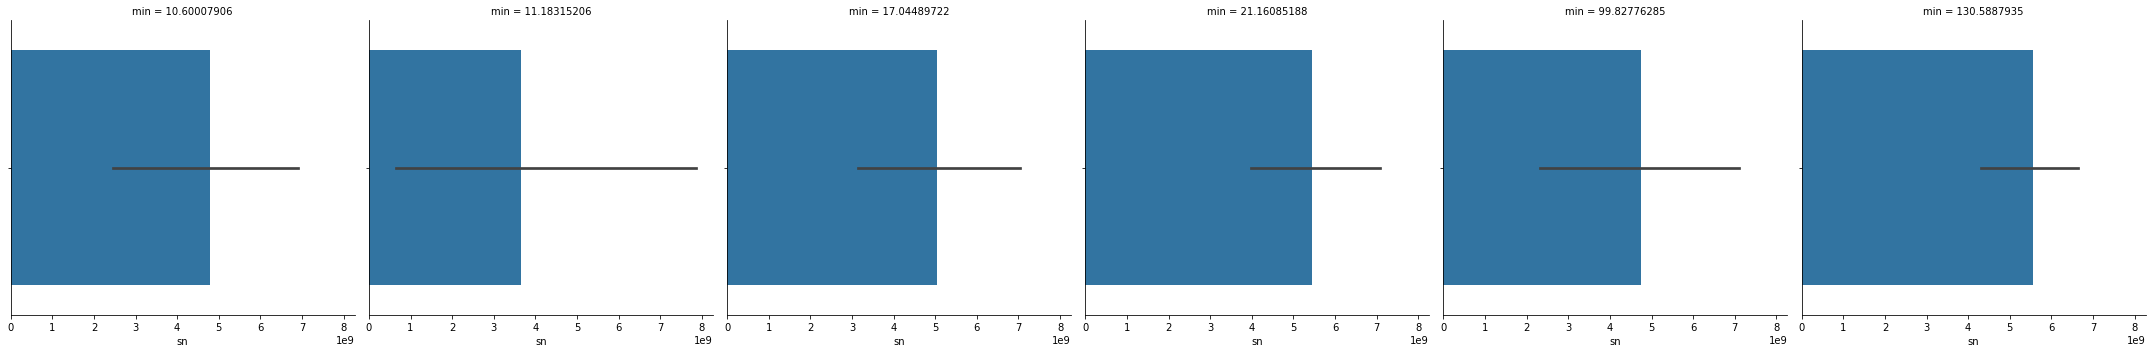

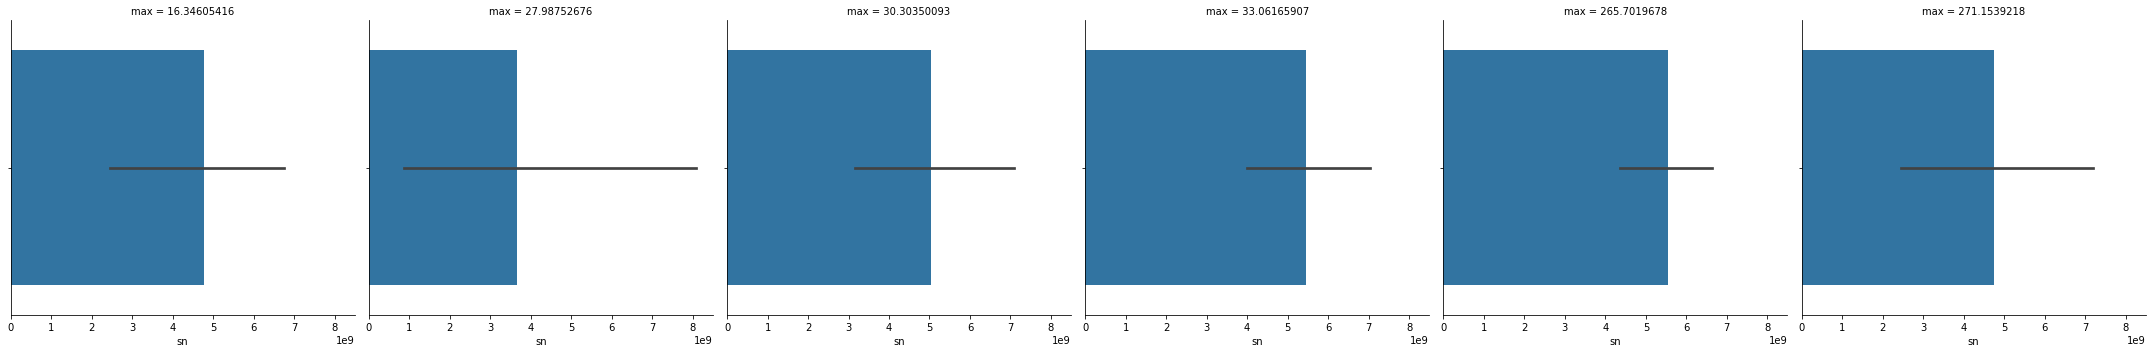

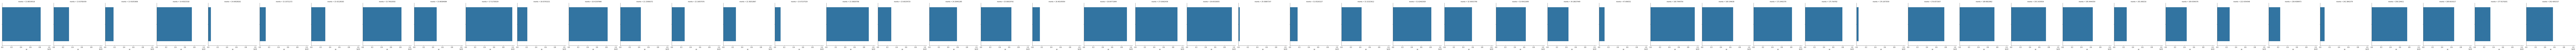

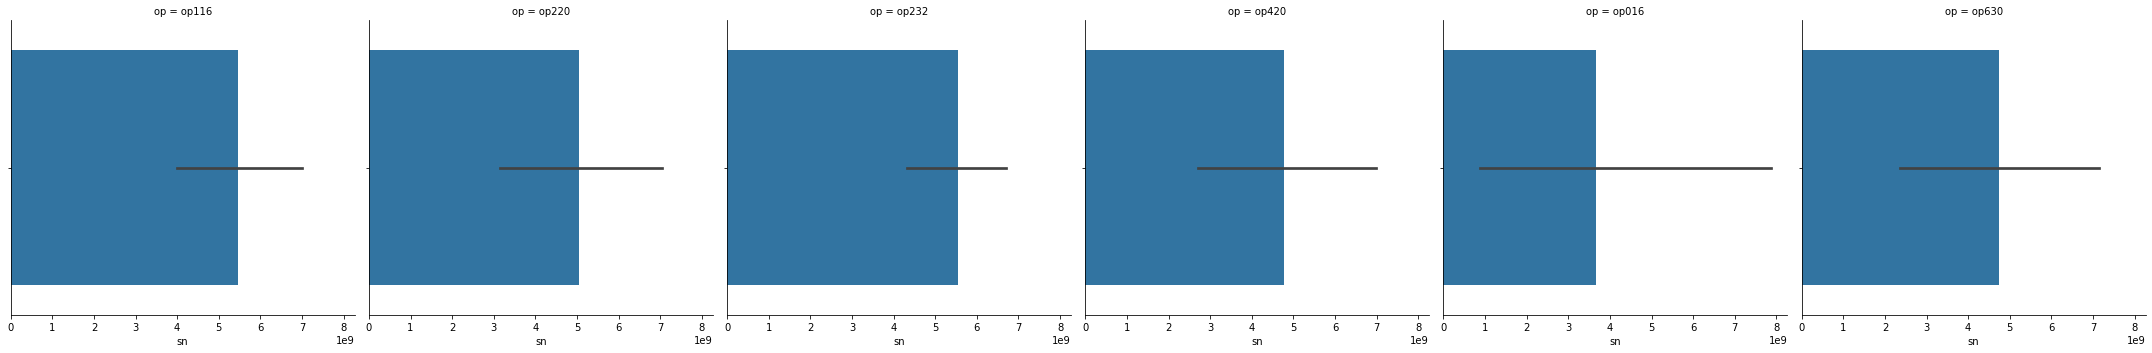

In [98]:
plt.figure(figsize=(20,20))
sns.catplot(data=df112, kind='bar', x='sn',col='min')
sns.catplot(data=df112, kind='bar', x='sn',col='max')
sns.catplot(data=df112, kind='bar', x='sn',col='msmts')
sns.catplot(data=df112, kind='bar', x='sn',col='op')
plt.show()

In [100]:
df113 = pd.read_csv(r'/Users/mrinalpatil/Desktop/Forage/GeneralElectric/av_manufacturing_summary_psql.csv')

In [101]:
df113.head(5)

pn     op  parts_mfg_ct    mfg_pct
0  65421P11  op232         12000  80.008331
1  65421P11  op630         12000   0.000000
2  44321P02  op016          8000  80.000000
3  44321P02  op420          8000  80.000000
4  54321P01  op116         12000  80.000000

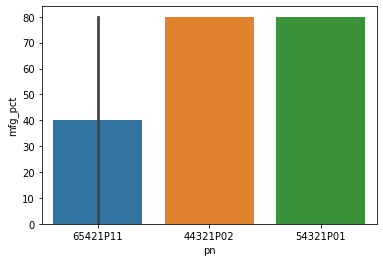

In [102]:
sns.barplot(x='pn', y='mfg_pct',data=df113);

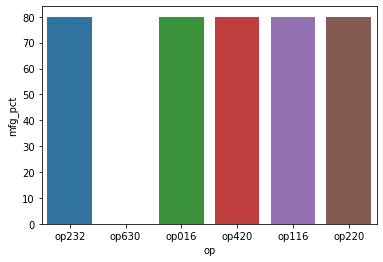

In [103]:
sns.barplot(x='op', y='mfg_pct',data=df113);

## Now goal is to predict the RUL for the LAST flight cycle for a given ESN

In [122]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


In [154]:
dfinal = pd.read_csv("final.csv", parse_dates=['datetime'])

In [155]:
dfinal.head(5)

dataset     esn  unit  flight_cycle            datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod  tra      t2      t24      t30      t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32  rul
0  test_FD001  999159    59            15 2018-01-04 17:23:30     FRON        KIND             KMCO      -0.0019        0.0002  100  518.67  1101.59  1581.43  1397.66  14.62  21.61  553.76  2387.98  9053.86  1.3  47.15  521.75  2388.00  8141.38  8.3718  0.03      390    2388        100  39.07  23.3881  119
1  test_FD001  999159    59             1 2017-12-31 20:29:57     FRON        KMCO             KCVG      -0.0008       -0.0004  100  518.67  1101.92  1589.29  1395.20  14.62  21.61  554.74  2387.96  9050.56  1.3  47.44  522.52  2388.02  8139.38  8.3801  0.03      390    2388        100  39.14  23.3486  119
2  test_FD001  999159    59            55 2018-01-09 12:13:13     FRON        KLAX             KATL       0.0008       -0.0001  100  518.67  1101.80  1577.44  1396.72  14.62  21.61  554.42  2387.97  9052.88  1.3  47.20  522.58  2388.04  8134.88  8.3841  0.03      393    2388        100  39.06  23.3695  119
3  test_FD001  999159    59             6 2018-01-02 06:49:26     FRON        KMKE             KMIA      -0.0009       -0.0002  100  518.67  1101.40  1579.85  1397.03  14.62  21.61  554.92  2388.00  9060.03  1.3  47.12  522.20  2388.00  8134.46  8.4105  0.03      391    2388        100  38.94  23.3968  119
4  test_FD001  999159    59            66 2018-01-10 09:13:00     FRON        KSAT             KONT       0.0003        0.0001  100  518.67  1101.92  1585.21  1406.96  14.62  21.61  554.56  2388.05  9061.70  1.3  47.12  522.33  2388.03  8134.46  8.4097  0.03      393    2388        100  38.98  23.4150  119

In [156]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7863 entries, 0 to 7862
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dataset           7863 non-null   object        
 1   esn               7863 non-null   int64         
 2   unit              7863 non-null   int64         
 3   flight_cycle      7863 non-null   int64         
 4   datetime          7863 non-null   datetime64[ns]
 5   operator          7863 non-null   object        
 6   depart_icao       7581 non-null   object        
 7   destination_icao  7497 non-null   object        
 8   hpc_eff_mod       7863 non-null   float64       
 9   hpc_flow_mod      7863 non-null   float64       
 10  tra               7863 non-null   int64         
 11  t2                7863 non-null   float64       
 12  t24               7863 non-null   float64       
 13  t30               7863 non-null   float64       
 14  t50               7863 n

In [157]:
dfinal.describe(include='all')

dataset            esn         unit  flight_cycle             datetime operator depart_icao destination_icao  hpc_eff_mod  hpc_flow_mod     tra            t2          t24          t30          t50            p2          p15          p30           nf           nc           epr         ps30          phi          nrf          nrc          bpr          farb      htbleed  nf_dmd  pcnfr_dmd          w31          w32          rul
count         7863    7863.000000  7863.000000   7863.000000                 7863     7863        7581             7497  7863.000000   7863.000000  7863.0  7.863000e+03  7863.000000  7863.000000  7863.000000  7.863000e+03  7863.000000  7863.000000  7863.000000  7863.000000  7.863000e+03  7863.000000  7863.000000  7863.000000  7863.000000  7863.000000  7.863000e+03  7863.000000  7863.0     7863.0  7863.000000  7863.000000  7863.000000
unique           1            NaN          NaN           NaN                 5947        3         217              211          NaN           NaN     NaN           NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN          NaN          NaN           NaN          NaN     NaN        NaN          NaN          NaN          NaN
top     test_FD001            NaN          NaN           NaN  2018-01-14 18:44:00      AXM        WMKK             WMKK          NaN           NaN     NaN           NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN          NaN          NaN           NaN          NaN     NaN        NaN          NaN          NaN          NaN
freq          7863            NaN          NaN           NaN                    8     5045        1905             1562          NaN           NaN     NaN           NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN          NaN          NaN           NaN          NaN     NaN        NaN          NaN          NaN          NaN
first          NaN            NaN          NaN           NaN  2017-12-31 18:22:57      NaN         NaN              NaN          NaN           NaN     NaN           NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN          NaN          NaN           NaN          NaN     NaN        NaN          NaN          NaN          NaN
last           NaN            NaN          NaN           NaN  2018-07-24 07:04:02      NaN         NaN              NaN          NaN           NaN     NaN           NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN          NaN           NaN          NaN          NaN          NaN          NaN          NaN           NaN          NaN     NaN        NaN          NaN          NaN          NaN
mean           NaN  999153.244563    53.244563     78.918352                  NaN      NaN         NaN              NaN     0.000005      0.000005   100.0  5.186700e+02  1102.144751  1588.146187  1404.281850  1.462000e+01    21.609691   553.755804  2388.070207  9058.730584  1.300000e+00    47.416045   521.750237  2388.070242  8139.244662     8.425900  3.000000e-02   392.564034  2388.0      100.0    38.891049    23.335624    74.818390
std            NaN      28.643980    28.643980     55.198817                  NaN      NaN         NaN              NaN     0.002225      0.000296     0.0  5.059386e-11     0.401772     5.085923     5.984049  1.350117e-12     0.001731     0.690370     0.058583    11.310730  4.174704e-14     0.198469     0.571852     0.057399    10.054097     0.029418  1.040900e-15     1.237890     0.0        0.0     0.143092     0.084965    51.138268
min            NaN  999101.000000     1.000000      1.000000         

In [158]:
dfinal.shape

(7863, 33)

In [159]:
dfinal.columns

Index(['dataset', 'esn', 'unit', 'flight_cycle', 'datetime', 'operator', 'depart_icao', 'destination_icao', 'hpc_eff_mod', 'hpc_flow_mod', 'tra', 't2', 't24', 't30', 't50', 'p2', 'p15', 'p30', 'nf', 'nc', 'epr', 'ps30', 'phi', 'nrf', 'nrc', 'bpr', 'farb', 'htbleed', 'nf_dmd', 'pcnfr_dmd', 'w31', 'w32', 'rul'], dtype='object')

In [160]:
dfinal['dataset'].value_counts()

test_FD001    7863
Name: dataset, dtype: int64

In [161]:
dfinal['esn'].value_counts()

999149    292
999193    256
999131    206
999191    205
999181    198
         ... 
999125     27
999133     27
999185     18
999122     17
999101     16
Name: esn, Length: 80, dtype: int64

In [162]:
dfinal['unit'].value_counts()

49    292
93    256
31    206
91    205
81    198
     ... 
25     27
9      27
85     18
22     17
1      16
Name: unit, Length: 80, dtype: int64

In [163]:
dfinal['operator'].value_counts()

AXM     5045
PGT     1456
FRON    1362
Name: operator, dtype: int64

In [164]:
dfinal['depart_icao'].value_counts()

WMKK    1905
VTBD     924
LTFJ     680
KDEN     197
KMCO     175
        ... 
WIPP       1
LTCD       1
VGHS       1
LTCI       1
UUDD       1
Name: depart_icao, Length: 217, dtype: int64

In [135]:
dfinal['destination_icao'].value_counts()

WMKK    1562
VTBD     758
LTFJ     645
VHHH     198
KDEN     187
        ... 
MMPR       1
KABQ       1
URMM       1
UKDE       1
VEBS       1
Name: destination_icao, Length: 211, dtype: int64

In [136]:
##Univariate Data Exploration

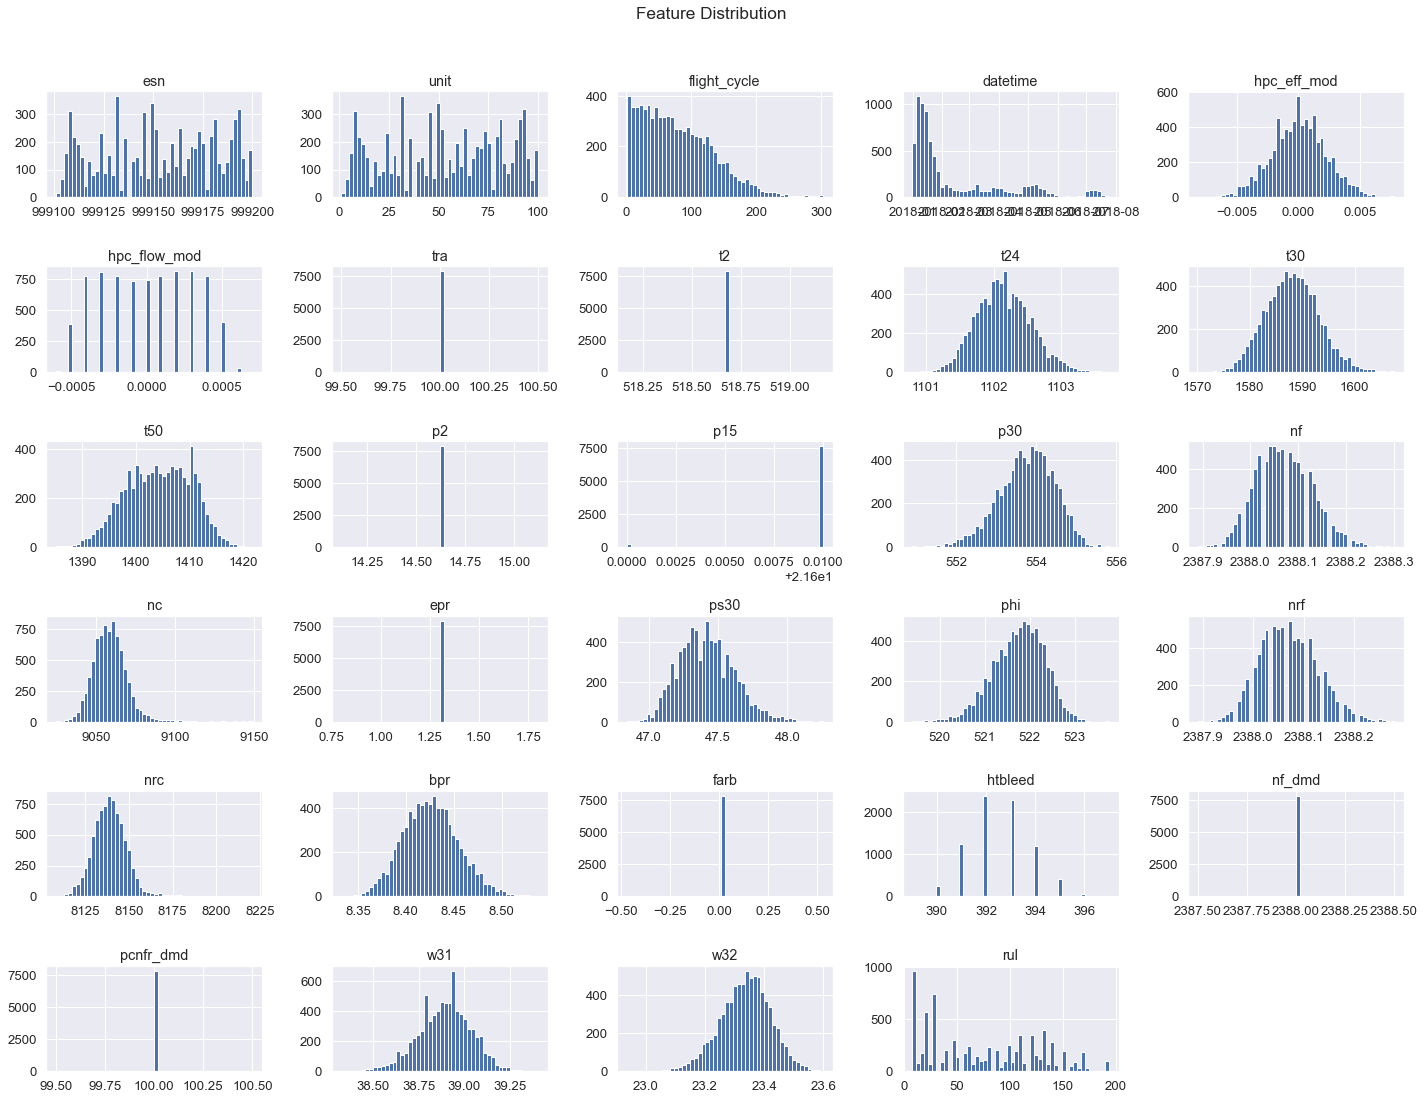

In [137]:
dfinal.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

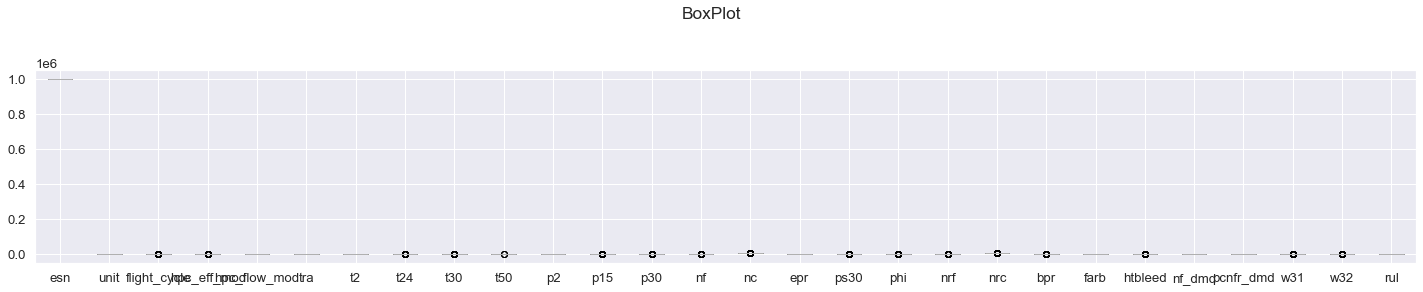

In [138]:
dfinal.boxplot(figsize=(20,4))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

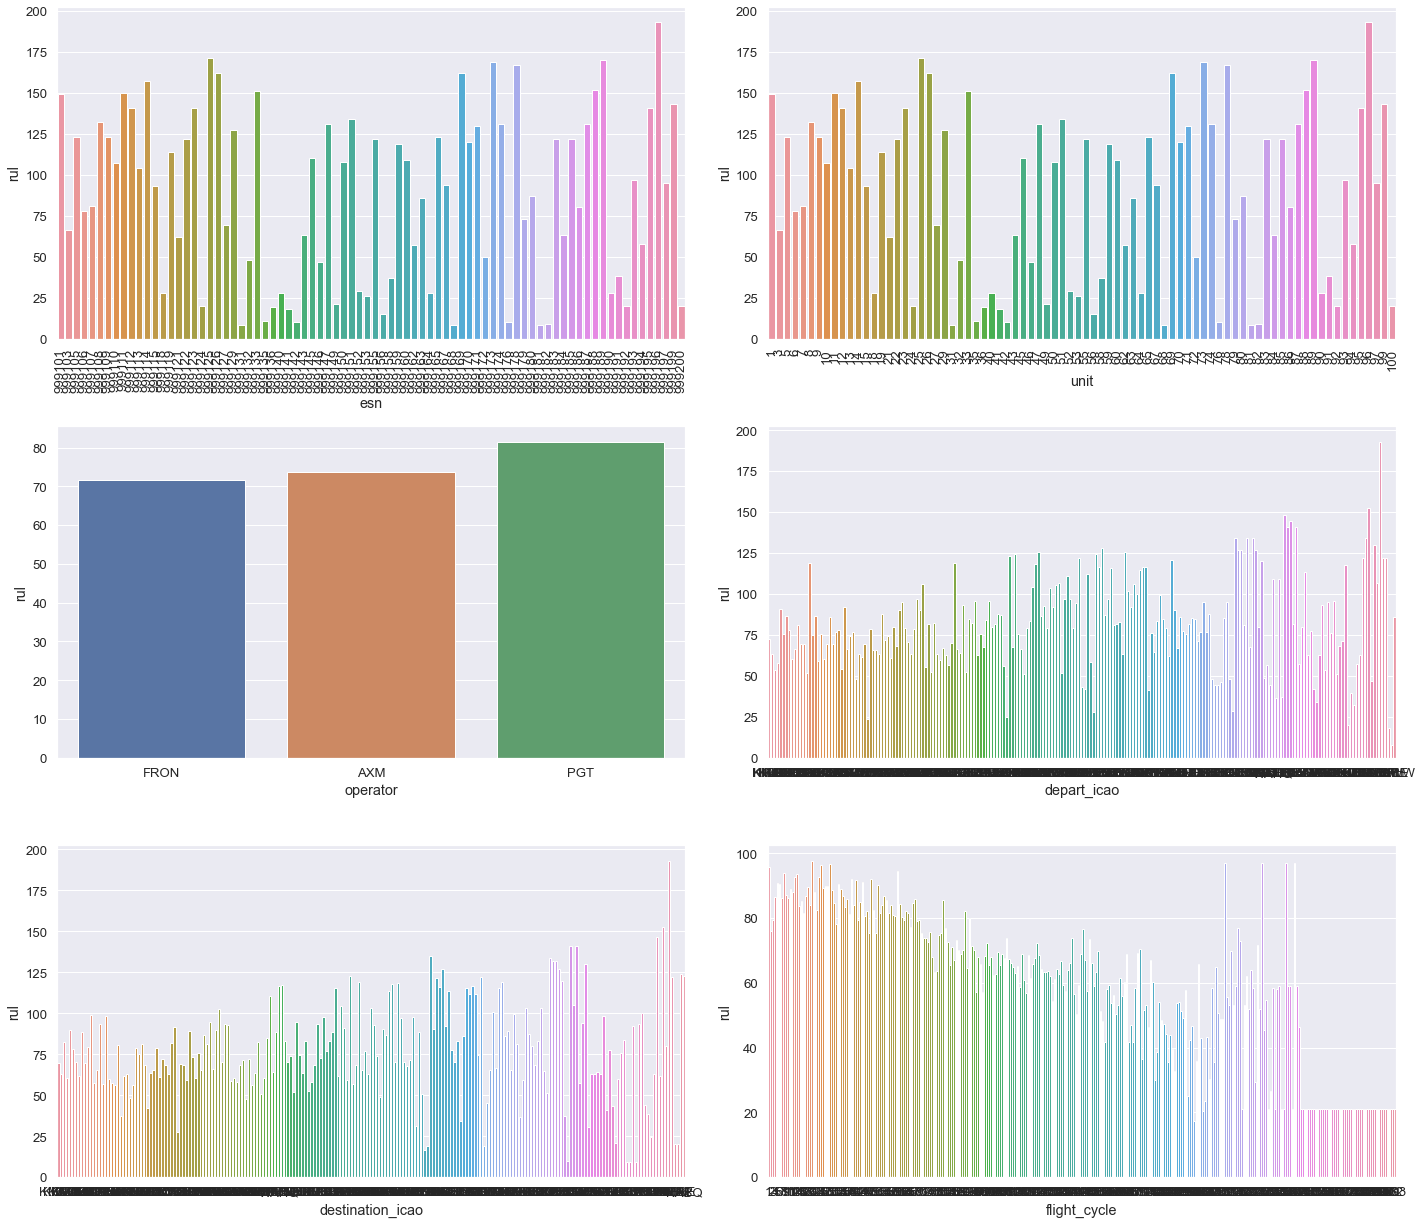

In [140]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("")
plt.xticks(rotation=90)
sns.barplot(x='esn',y='rul',data=dfinal, ci=None)

plt.subplot(7,2,2)
plt.title("")
plt.xticks(rotation=90)
sns.barplot(x='unit',y='rul',data=dfinal, ci=None)

plt.subplot(7,2,3)
plt.title("")
sns.barplot(x='operator',y='rul',data=dfinal, ci=None)

plt.subplot(7,2,4)
plt.title("")
sns.barplot(x='depart_icao',y='rul',data=dfinal, ci=None)

plt.subplot(7,2,5)
plt.title("")
sns.barplot(x='destination_icao',y='rul',data=dfinal, ci=None)

plt.subplot(7,2,6)
plt.title("")
sns.barplot(x='flight_cycle',y='rul',data=dfinal,ci=None)

plt.tight_layout()
plt.show()

In [141]:
##Bivariate Data Exploration

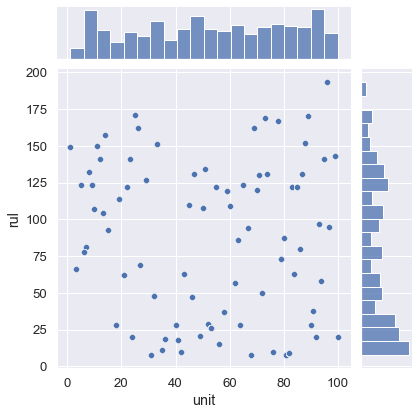

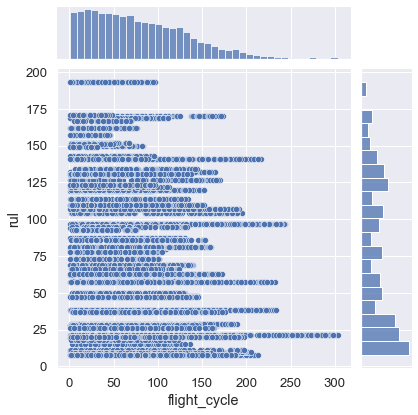

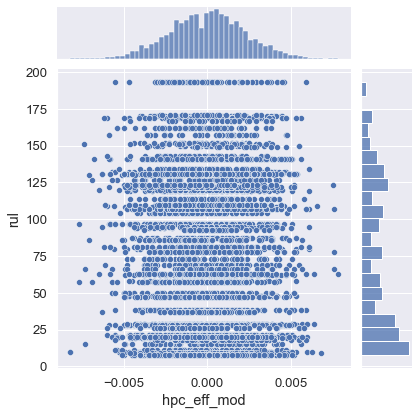

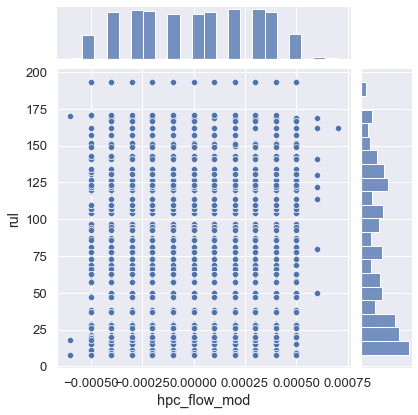

In [142]:
sns.jointplot(x='unit', y='rul',data=dfinal, kind='scatter')

sns.jointplot(x='flight_cycle', y='rul',data=dfinal, kind='scatter')

sns.jointplot(x='hpc_eff_mod', y='rul',data=dfinal, kind='scatter')

sns.jointplot(x='hpc_flow_mod', y='rul',data=dfinal, kind='scatter')

plt.show()

In [144]:
#Correlation 

In [143]:
dfinal.corr()

esn      unit  flight_cycle  hpc_eff_mod  hpc_flow_mod  tra  t2       t24       t30       t50  p2       p15       p30        nf        nc  epr      ps30       phi       nrf       nrc       bpr  farb   htbleed  nf_dmd  pcnfr_dmd       w31       w32       rul
esn           1.000000  1.000000      0.046623    -0.026412      0.018216  NaN NaN  0.094325  0.079530  0.114489 NaN  0.015508 -0.128837  0.093403  0.063645  NaN  0.137983 -0.114160  0.106837  0.037100  0.114508   NaN  0.120118     NaN        NaN -0.109303 -0.105738 -0.084111
unit          1.000000  1.000000      0.046623    -0.026412      0.018216  NaN NaN  0.094325  0.079530  0.114489 NaN  0.015508 -0.128837  0.093403  0.063645  NaN  0.137983 -0.114160  0.106837  0.037100  0.114508   NaN  0.120118     NaN        NaN -0.109303 -0.105738 -0.084111
flight_cycle  0.046623  0.046623      1.000000    -0.007069     -0.011828  NaN NaN  0.344785  0.323891  0.393362 NaN  0.079062 -0.406334  0.308573  0.347876  NaN  0.448452 -0.418513  0.313009  0.256270  0.380151   NaN  0.362223     NaN        NaN -0.374796 -0.384063 -0.248465
hpc_eff_mod  -0.026412 -0.026412     -0.007069     1.000000     -0.023861  NaN NaN -0.004055 -0.010109 -0.011505 NaN -0.015221  0.011114 -0.009273 -0.009813  NaN -0.002617  0.012508 -0.002640 -0.008558 -0.011239   NaN -0.009323     NaN        NaN  0.012907  0.018050  0.013911
hpc_flow_mod  0.018216  0.018216     -0.011828    -0.023861      1.000000  NaN NaN -0.037353 -0.019311 -0.026078 NaN -0.003432  0.027071 -0.024578  0.020917  NaN -0.031080  0.029975 -0.032781  0.029671 -0.015598   NaN -0.005599     NaN        NaN  0.021063  0.035586  0.002874
tra                NaN       NaN           NaN          NaN           NaN  NaN NaN       NaN       NaN       NaN NaN       NaN       NaN       NaN       NaN  NaN       NaN       NaN       NaN       NaN       NaN   NaN       NaN     NaN        NaN       NaN       NaN       NaN
t2                 NaN       NaN           NaN          NaN           NaN  NaN NaN       NaN       NaN       NaN NaN       NaN       NaN       NaN       NaN  NaN       NaN       NaN       NaN       NaN       NaN   NaN       NaN     NaN        NaN       NaN       NaN       NaN
t24           0.094325  0.094325      0.344785    -0.004055     -0.037353  NaN NaN  1.000000  0.405762  0.531269 NaN  0.139542 -0.533862  0.534844  0.019711  NaN  0.575017 -0.570887  0.542922 -0.100406  0.511332   NaN  0.439388     NaN        NaN -0.479120 -0.475057 -0.154064
t30           0.079530  0.079530      0.323891    -0.010109     -0.019311  NaN NaN  0.405762  1.000000  0.463293 NaN  0.102037 -0.491826  0.470480  0.068078  NaN  0.516137 -0.501161  0.458132 -0.035983  0.446520   NaN  0.397901     NaN        NaN -0.434341 -0.421340 -0.144724
t50           0.114489  0.114489      0.393362    -0.011505     -0.026078  NaN NaN  0.531269  0.463293  1.000000 NaN  0.146903 -0.635967  0.638285  0.006620  NaN  0.678545 -0.664745  0.630168 -0.135565  0.588254   NaN  0.515636     NaN        NaN -0.562668 -0.555163 -0.164690
p2                 NaN       NaN           NaN          NaN           NaN  NaN NaN       NaN       NaN       NaN NaN       NaN       NaN       NaN       NaN  NaN       NaN       NaN       NaN       NaN       NaN   NaN       NaN     NaN        NaN       NaN       NaN       NaN
p15           0.015508  0.015508      0.079062    -0.015221     -0.003432  NaN NaN  0.139542  0.102037  0.146903 NaN  1.000000 -0.148451  0.155188 -0.012053  NaN  0.160410 -0.154327  0.159007 -0.053558  0.149081   NaN  0.122337     NaN        NaN -0.136132 -0.134718 -0.017937
p30          -0.128837 -0.128837     -0.406334     0.011114      0.027071  NaN NaN -0.533862 -0.491826 -0.635967 NaN -0.148451  1.000000 -0.663408  0.017322  NaN -0.700382  0.686906 -0.662927  0.164936 -0.603057   NaN -0.536865     NaN        NaN  0.584216  0.565445  0.171133
nf            0.093403  0.093403      0.308573    -0.009273     -0.024578  NaN NaN  0.534844  0.470480  0.638285 NaN  0.155188 -0.663408  1.0

In [145]:
## Heat map to plot correlation

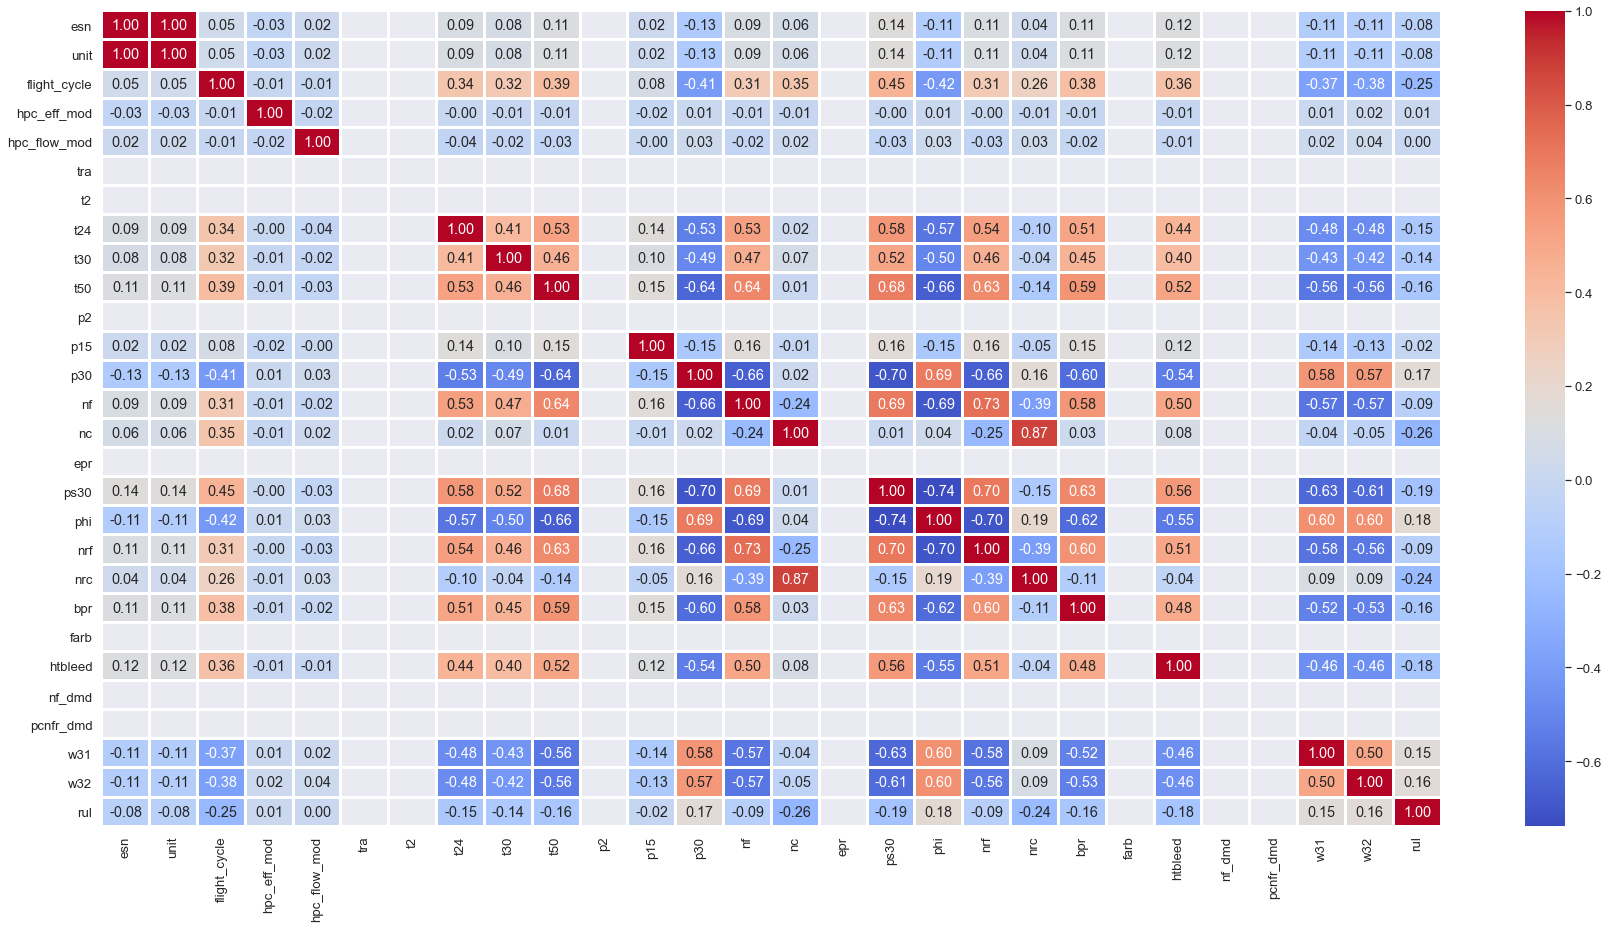

In [146]:
plt.figure(figsize=(30,15))
sns.heatmap(dfinal.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

In [147]:
##Pairplots

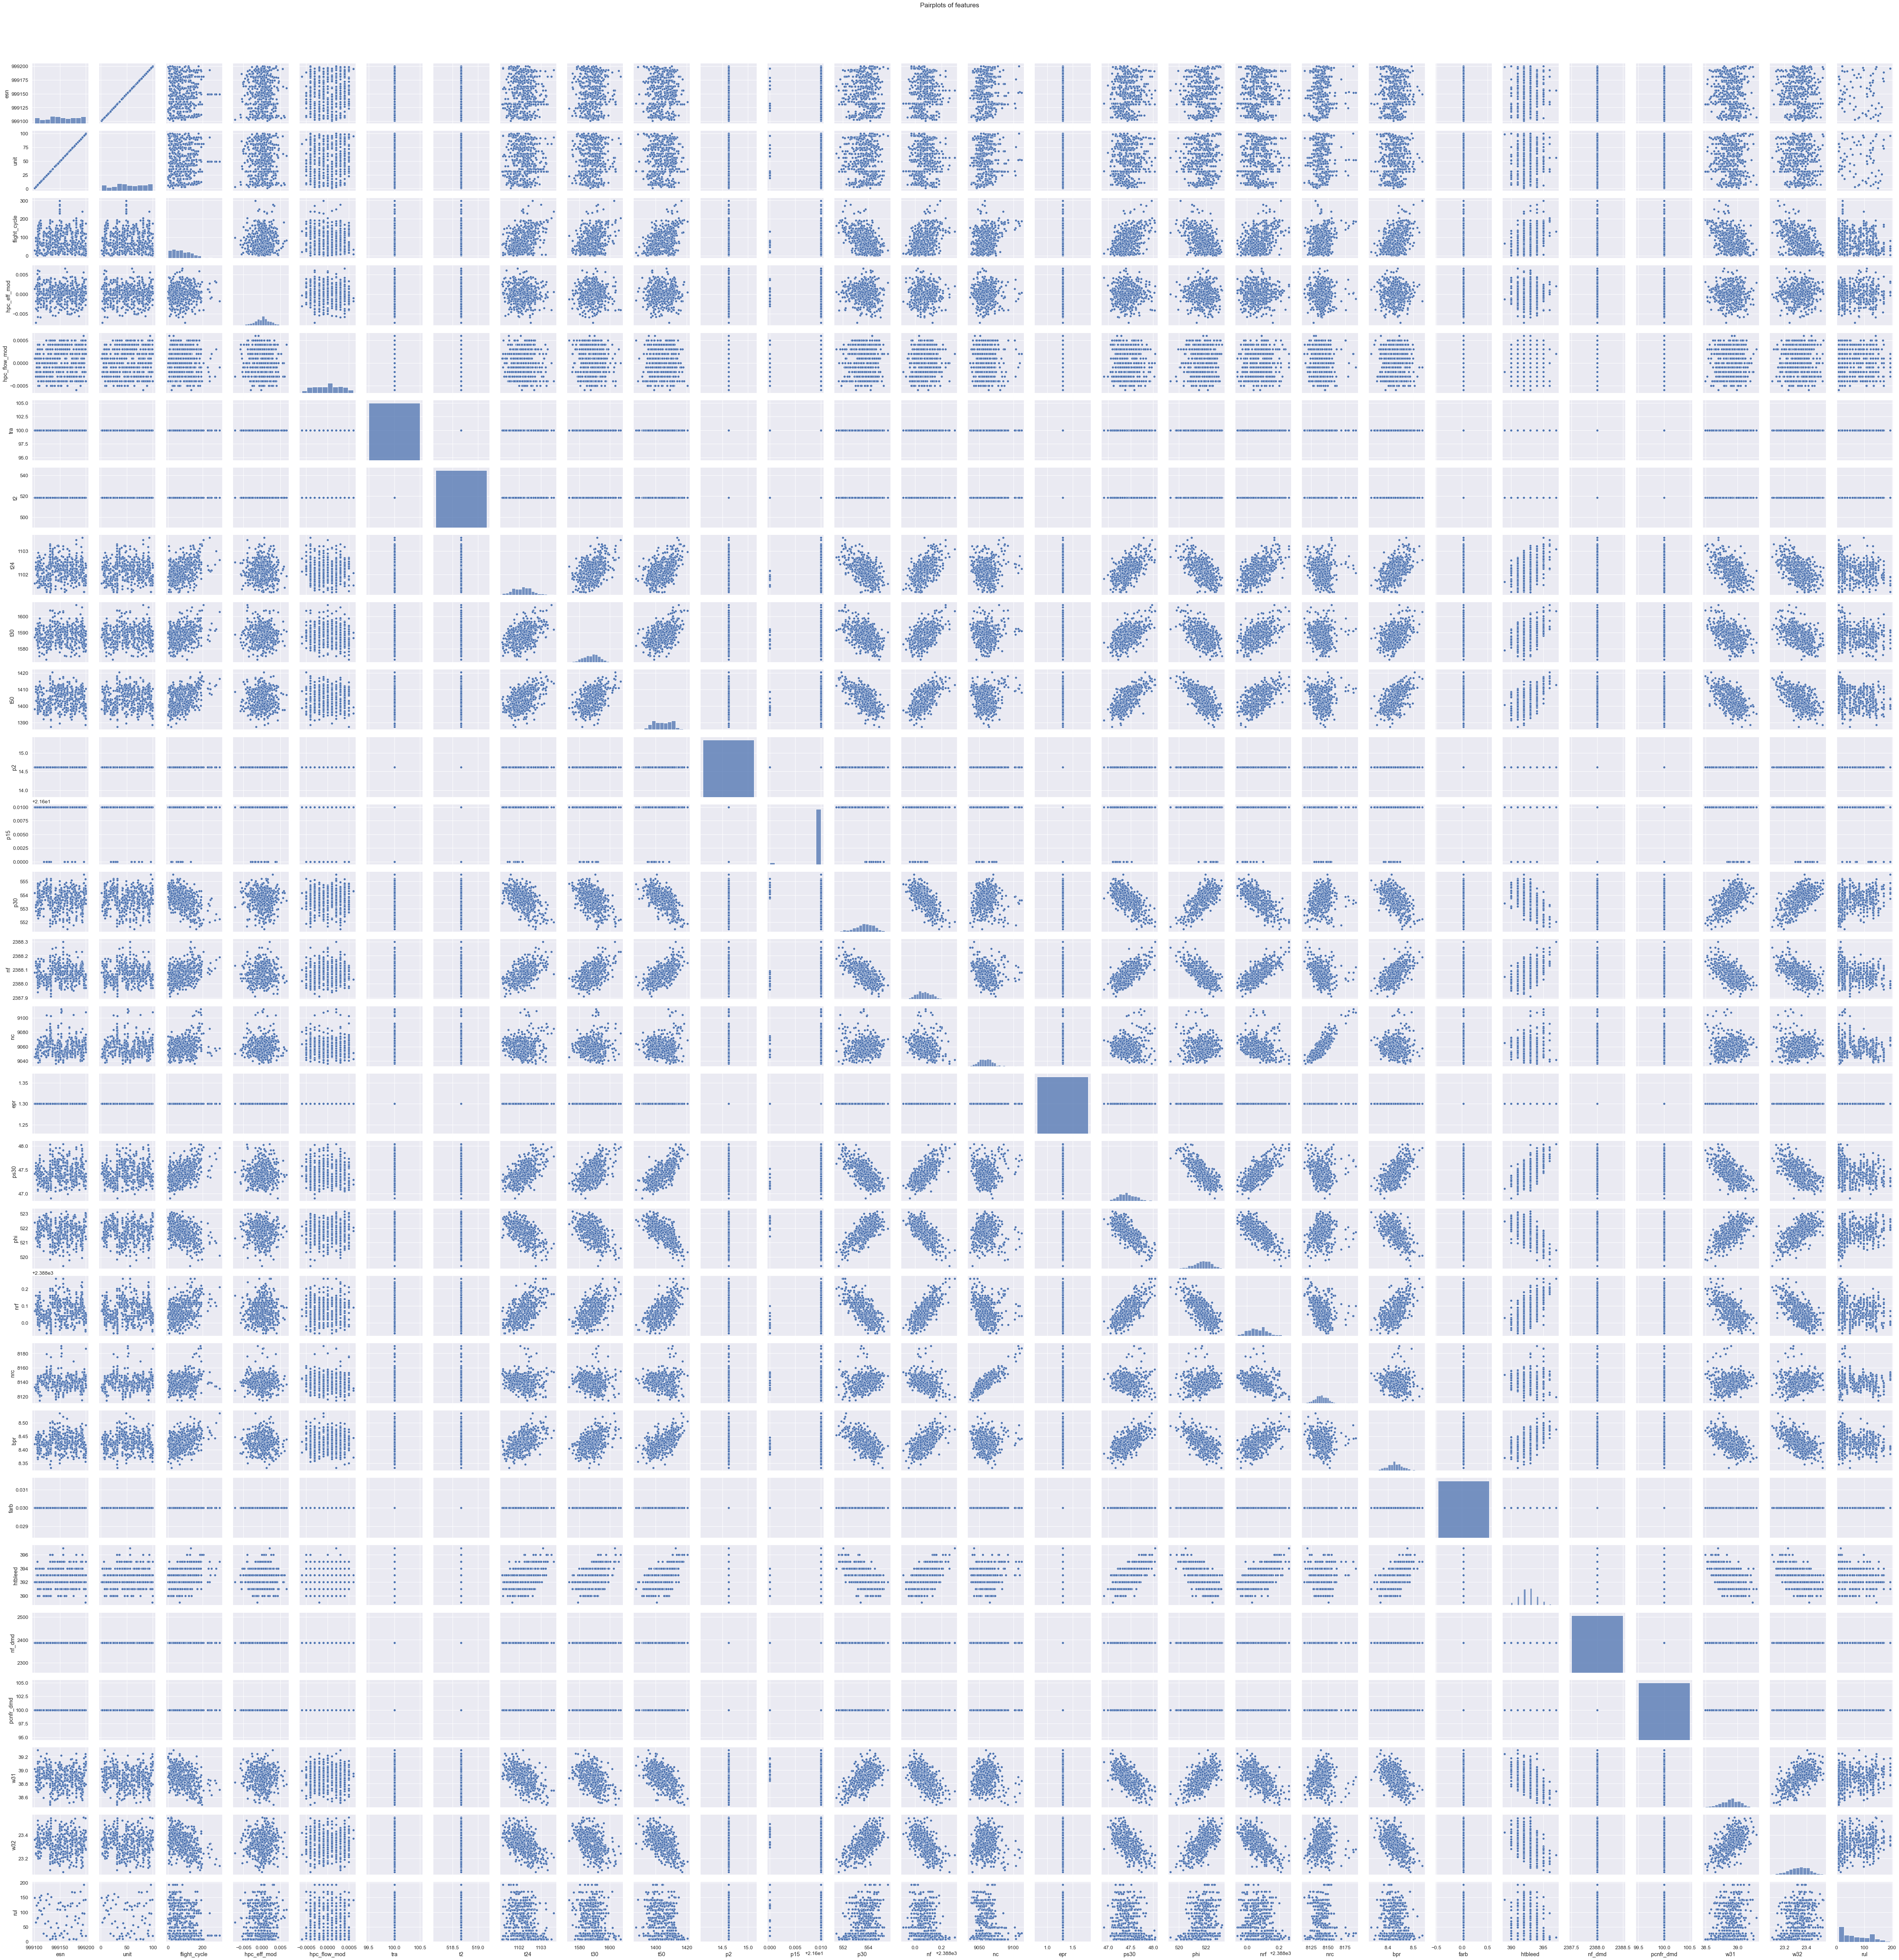

In [148]:
sns.pairplot(dfinal.sample(500))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### "Data Preprocessing"

In [149]:
# Dropping unwanted columns

In [165]:
dfinal.columns

Index(['dataset', 'esn', 'unit', 'flight_cycle', 'datetime', 'operator', 'depart_icao', 'destination_icao', 'hpc_eff_mod', 'hpc_flow_mod', 'tra', 't2', 't24', 't30', 't50', 'p2', 'p15', 'p30', 'nf', 'nc', 'epr', 'ps30', 'phi', 'nrf', 'nrc', 'bpr', 'farb', 'htbleed', 'nf_dmd', 'pcnfr_dmd', 'w31', 'w32', 'rul'], dtype='object')

In [166]:
dfinal.drop(['dataset', 'esn', 'datetime', 'operator', 'depart_icao', 'destination_icao'],axis=1,inplace=True)

In [167]:
dfinal.head(5)

unit  flight_cycle  hpc_eff_mod  hpc_flow_mod  tra      t2      t24      t30      t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32  rul
0    59            15      -0.0019        0.0002  100  518.67  1101.59  1581.43  1397.66  14.62  21.61  553.76  2387.98  9053.86  1.3  47.15  521.75  2388.00  8141.38  8.3718  0.03      390    2388        100  39.07  23.3881  119
1    59             1      -0.0008       -0.0004  100  518.67  1101.92  1589.29  1395.20  14.62  21.61  554.74  2387.96  9050.56  1.3  47.44  522.52  2388.02  8139.38  8.3801  0.03      390    2388        100  39.14  23.3486  119
2    59            55       0.0008       -0.0001  100  518.67  1101.80  1577.44  1396.72  14.62  21.61  554.42  2387.97  9052.88  1.3  47.20  522.58  2388.04  8134.88  8.3841  0.03      393    2388        100  39.06  23.3695  119
3    59             6      -0.0009       -0.0002  100  518.67  1101.40  1579.85  1397.03  14.62  21.61  554.92  2388.00  9060.03  1.3  47.12  522.20  2388.00  8134.46  8.4105  0.03      391    2388        100  38.94  23.3968  119
4    59            66       0.0003        0.0001  100  518.67  1101.92  1585.21  1406.96  14.62  21.61  554.56  2388.05  9061.70  1.3  47.12  522.33  2388.03  8134.46  8.4097  0.03      393    2388        100  38.98  23.4150  119

In [168]:
## Checking for null values

In [169]:
dfinal.isnull().sum()

unit            0
flight_cycle    0
hpc_eff_mod     0
hpc_flow_mod    0
tra             0
t2              0
t24             0
t30             0
t50             0
p2              0
p15             0
p30             0
nf              0
nc              0
epr             0
ps30            0
phi             0
nrf             0
nrc             0
bpr             0
farb            0
htbleed         0
nf_dmd          0
pcnfr_dmd       0
w31             0
w32             0
rul             0
dtype: int64

In [170]:
## Checking for duplicate values

In [171]:
dfinal.duplicated(keep='first').sum()

1238

In [177]:
dfinal[dfinal.duplicated(keep=False)] 

unit  flight_cycle  hpc_eff_mod  hpc_flow_mod  tra      t2      t24      t30       t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32  rul
138     31           100       0.0007        0.0004  100  518.67  1102.65  1581.48  1395.890  14.62  21.61  554.58  2388.03  9067.04  1.3  47.50  521.81  2388.03  8150.13  8.4467  0.03      393    2388        100  38.88  23.4060    8
139     31            94       0.0028       -0.0002  100  518.67  1101.48  1587.82  1406.170  14.62  21.61  553.80  2388.03  9071.09  1.3  47.57  521.58  2388.02  8149.83  8.3995  0.03      392    2388        100  38.90  23.3484    8
140     31            54       0.0008        0.0001  100  518.67  1102.04  1594.56  1399.040  14.62  21.61  554.32  2388.01  9074.51  1.3  47.31  521.64  2388.06  8147.86  8.3937  0.03      393    2388        100  38.89  23.3696    8
144     31           118      -0.0023        0.0005  100  518.67  1102.54  1592.12  1410.270  14.62  21.61  553.03  2388.09  9076.24  1.3  47.55  521.50  2388.12  8141.29  8.4208  0.03      393    2388        100  38.93  23.2933    8
145     31           101       0.0033        0.0004  100  518.67  1102.24  1595.09  1403.620  14.62  21.61  554.16  2388.07  9077.60  1.3  47.44  521.93  2387.96  8152.98  8.4204  0.03      392    2388        100  38.86  23.3907    8
...    ...           ...          ...           ...  ...     ...      ...      ...       ...    ...    ...     ...      ...      ...  ...    ...     ...      ...      ...     ...   ...      ...     ...        ...    ...      ...  ...
7268    14            14       0.0019       -0.0001  100  518.67  1102.16  1588.04  1409.690  14.62  21.61  553.97  2388.12  9032.93  1.3  47.47  521.12  2388.12  8121.04  8.4402  0.03      394    2388        100  38.76  23.4023  157
7269    14            25       0.0047        0.0004  100  518.67  1102.23  1586.48  1403.990  14.62  21.61  553.32  2388.16  9040.89  1.3  47.62  521.71  2388.17  8115.83  8.4079  0.03      392    2388        100  38.85  23.2271  157
7270    14             7      -0.0007       -0.0005  100  518.67  1102.63  1588.25  1409.930  14.62  21.61  553.62  2388.20  9035.10  1.3  47.52  520.54  2388.18  8114.73  8.4362  0.03      394    2388        100  39.00  23.1876  157
7271    14            25       0.0047        0.0004  100  518.67  1102.23  1586.48  1403.990  14.62  21.61  553.32  2388.16  9040.89  1.3  47.62  521.71  2388.17  8115.83  8.4079  0.03      392    2388        100  38.85  23.2271  157
7276    14            21      -0.0026        0.0004  100  518.67  1102.29  1594.25  1412.005  14.62  21.61  553.62  2388.16  9040.33  1.3  47.49  520.94  2388.09  8120.80  8.4490  0.03      393    2388        100  38.98  23.3165  157

[2476 rows x 27 columns]

In [180]:
## FOR OUTLIERS ( One-Hot Encoding)

In [179]:
dfinal.describe()

unit  flight_cycle  hpc_eff_mod  hpc_flow_mod     tra            t2          t24          t30          t50            p2          p15          p30           nf           nc           epr         ps30          phi          nrf          nrc          bpr          farb      htbleed  nf_dmd  pcnfr_dmd          w31          w32          rul
count  7863.000000   7863.000000  7863.000000   7863.000000  7863.0  7.863000e+03  7863.000000  7863.000000  7863.000000  7.863000e+03  7863.000000  7863.000000  7863.000000  7863.000000  7.863000e+03  7863.000000  7863.000000  7863.000000  7863.000000  7863.000000  7.863000e+03  7863.000000  7863.0     7863.0  7863.000000  7863.000000  7863.000000
mean     53.244563     78.918352     0.000005      0.000005   100.0  5.186700e+02  1102.144751  1588.146187  1404.281850  1.462000e+01    21.609691   553.755804  2388.070207  9058.730584  1.300000e+00    47.416045   521.750237  2388.070242  8139.244662     8.425900  3.000000e-02   392.564034  2388.0      100.0    38.891049    23.335624    74.818390
std      28.643980     55.198817     0.002225      0.000296     0.0  5.059386e-11     0.401772     5.085923     5.984049  1.350117e-12     0.001731     0.690370     0.058583    11.310730  4.174704e-14     0.198469     0.571852     0.057399    10.054097     0.029418  1.040900e-15     1.237890     0.0        0.0     0.143092     0.084965    51.138268
min       1.000000      1.000000    -0.008200     -0.000600   100.0  5.186700e+02  1100.800000  1570.120000  1385.210000  1.462000e+01    21.600000   550.910000  2387.890000  9024.530000  1.300000e+00    46.840000   519.390000  2387.890000  8108.500000     8.332800  3.000000e-02   389.000000  2388.0      100.0    38.330000    22.935400     8.000000
25%      29.000000     34.000000    -0.001500     -0.000300   100.0  5.186700e+02  1101.860000  1584.600000  1399.810000  1.462000e+01    21.610000   553.310000  2388.030000  9051.460000  1.300000e+00    47.270000   521.370000  2388.030000  8132.900000     8.405200  3.000000e-02   392.000000  2388.0      100.0    38.800000    23.280800    28.000000
50%      53.000000     70.000000     0.000000      0.000000   100.0  5.186700e+02  1102.130000  1588.060000  1404.450000  1.462000e+01    21.610000   553.800000  2388.070000  9058.040000  1.300000e+00    47.400000   521.790000  2388.070000  8138.850000     8.424900  3.000000e-02   393.000000  2388.0      100.0    38.900000    23.339500    69.000000
75%      79.000000    115.000000     0.001500      0.000300   100.0  5.186700e+02  1102.415000  1591.520000  1409.125000  1.462000e+01    21.610000   554.250000  2388.110000  9064.675000  1.300000e+00    47.540000   522.160000  2388.110000  8144.895000     8.444700  3.000000e-02   393.000000  2388.0      100.0    38.990000    23.393400   120.000000
max     100.000000    303.000000     0.007800      0.000700   100.0  5.186700e+02  1103.700000  1607.550000  1421.680000  1.462000e+01    21.610000   555.810000  2388.300000  9148.850000  1.300000e+00    48.260000   523.760000  2388.280000  8220.480000     8.537500  3.000000e-02   397.000000  2388.0      100.0    39.400000    23.600300   193.000000

In [182]:
dfinal.to_csv("train.csv",index=False)

In [183]:
dfinal.shape

(7863, 27)

In [185]:
## Train Test Split

In [190]:
dfinal = pd.read_csv("train.csv")

In [191]:
dfinal.head(5)

unit  flight_cycle  hpc_eff_mod  hpc_flow_mod  tra      t2      t24      t30      t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32  rul
0    59            15      -0.0019        0.0002  100  518.67  1101.59  1581.43  1397.66  14.62  21.61  553.76  2387.98  9053.86  1.3  47.15  521.75  2388.00  8141.38  8.3718  0.03      390    2388        100  39.07  23.3881  119
1    59             1      -0.0008       -0.0004  100  518.67  1101.92  1589.29  1395.20  14.62  21.61  554.74  2387.96  9050.56  1.3  47.44  522.52  2388.02  8139.38  8.3801  0.03      390    2388        100  39.14  23.3486  119
2    59            55       0.0008       -0.0001  100  518.67  1101.80  1577.44  1396.72  14.62  21.61  554.42  2387.97  9052.88  1.3  47.20  522.58  2388.04  8134.88  8.3841  0.03      393    2388        100  39.06  23.3695  119
3    59             6      -0.0009       -0.0002  100  518.67  1101.40  1579.85  1397.03  14.62  21.61  554.92  2388.00  9060.03  1.3  47.12  522.20  2388.00  8134.46  8.4105  0.03      391    2388        100  38.94  23.3968  119
4    59            66       0.0003        0.0001  100  518.67  1101.92  1585.21  1406.96  14.62  21.61  554.56  2388.05  9061.70  1.3  47.12  522.33  2388.03  8134.46  8.4097  0.03      393    2388        100  38.98  23.4150  119

In [188]:
X = dfinal.iloc[:,0:26]
y = dfinal.iloc[:,26]

In [189]:
X.values, y.values

(array([[ 59.    ,  15.    ,  -0.0019, ..., 100.    ,  39.07  ,  23.3881],
        [ 59.    ,   1.    ,  -0.0008, ..., 100.    ,  39.14  ,  23.3486],
        [ 59.    ,  55.    ,   0.0008, ..., 100.    ,  39.06  ,  23.3695],
        ...,
        [  1.    ,   4.    ,   0.0042, ..., 100.    ,  39.    ,  23.3737],
        [  1.    ,  31.    ,  -0.0006, ..., 100.    ,  38.81  ,  23.3552],
        [  1.    ,  11.    ,   0.0007, ..., 100.    ,  39.06  ,  23.3609]]),
 array([119, 119, 119, ..., 149, 149, 149]))

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [193]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6290, 26), (1573, 26), (6290,), (1573,))

In [194]:
X_train[0:5]

unit  flight_cycle  hpc_eff_mod  hpc_flow_mod  tra      t2      t24      t30       t50     p2    p15     p30       nf       nc  epr   ps30     phi      nrf      nrc     bpr  farb  htbleed  nf_dmd  pcnfr_dmd    w31      w32
7156     6            81       0.0046        0.0003  100  518.67  1102.26  1577.57  1406.420  14.62  21.61  553.43  2388.09  9059.78  1.3  47.47  521.51  2388.09  8134.30  8.4234  0.03      393    2388        100  38.93  23.4005
3490    23           119       0.0016       -0.0004  100  518.67  1102.26  1581.73  1395.800  14.62  21.61  553.98  2388.04  9046.53  1.3  47.19  522.00  2388.05  8128.95  8.4147  0.03      391    2388        100  38.81  23.3048
4832    49           275      -0.0035        0.0001  100  518.67  1102.63  1593.65  1412.155  14.62  21.61  552.46  2388.20  9051.39  1.3  47.67  521.09  2388.22  8129.83  8.4692  0.03      394    2388        100  38.76  23.2642
6730    56            84      -0.0005       -0.0001  100  518.67  1102.42  1596.81  1411.265  14.62  21.61  553.45  2388.22  9042.49  1.3  47.59  520.82  2388.18  8123.36  8.4917  0.03      395    2388        100  38.70  23.3003
6777    56            69       0.0010        0.0001  100  518.67  1102.51  1592.73  1413.555  14.62  21.61  553.06  2388.15  9045.47  1.3  47.74  520.89  2388.15  8125.09  8.4402  0.03      394    2388        100  38.95  23.2476

In [195]:
scaler = StandardScaler()

In [196]:
X_train_scaled = scaler.fit_transform(X_train)

In [197]:
X_test_scaled = scaler.transform(X_test)

In [198]:
X_train_scaled

array([[-1.6464512 ,  0.0494654 ,  2.05610368, ...,  0.        ,
         0.27396144,  0.7639118 ],
       [-1.05488038,  0.74063918,  0.71009116, ...,  0.        ,
        -0.56697428, -0.36250075],
       [-0.150125  ,  3.57808946, -1.57813014, ...,  0.        ,
        -0.91736416, -0.84037275],
       ...,
       [ 1.34620121, -0.95091772, -0.36671887, ...,  0.        ,
         0.27396144, -0.11179451],
       [-1.2288718 , -1.00548407, -0.41158595, ...,  0.        ,
         1.18497513,  1.99625658],
       [-0.04573015,  0.41324107,  0.62035699, ...,  0.        ,
         0.06372751,  1.18293257]])

In [199]:
X_test_scaled

array([[-1.57685464, -0.87816258,  0.03708489, ...,  0.        ,
         0.34403941,  0.25543717],
       [ 0.89382352, -1.15099434,  1.38309742, ...,  0.        ,
         1.53536501,  2.42233949],
       [-0.42851127, -1.24193826,  0.39602157, ...,  0.        ,
         0.27396144,  2.23754662],
       ...,
       [-0.84609067,  1.63188959, -0.23211761, ...,  0.        ,
         0.13380548, -0.89451588],
       [ 1.38099949,  0.41324107, -0.32185178, ...,  0.        ,
        -0.2165844 , -0.93806579],
       [ 1.17220979, -0.89635136,  0.5754899 , ...,  0.        ,
         0.27396144,  1.12996646]])